<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; Olaran ,Sebastian; alumno3</center>


#Checkpoint 1: Análisis exploratorio y Preprocesamiento de Datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Comenzamos importando todas las librerías que vamos a utilizar en el proyecto

In [2]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los archivos csv de datos en dos DataFrames de Pandas

In [3]:
ds_hoteles_test = pd.read_csv('./hotels_test.csv')
ds_hoteles_train = pd.read_csv('./hotels_train.csv')



---


# A) Exploracion Inicial

Vamos a empezar viendo qué forma tiene el dataset, cuántas variables tiene y qué describe cada campo, de esta forma podemos saber de antemano con qué nos enfrentamos.

Vemos información sobre las 2 primeras filas del DataFrame

In [4]:
ds_hoteles_train.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0


Vemos información de las últimas 2 filas del DataFrame

In [5]:
ds_hoteles_train.tail(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,No Deposit,9.0,NaN,0,Transient,143.29,0,0,7137e599-4442-41fb-b147-4aba9f344e38,1


Vemos cuántas filas y cuántas columnas tiene el DataFrame

In [6]:
ds_hoteles_train.shape

(61913, 31)

Se tienen 61913 filas y 30 columnas. En otras palabras, contamos con datos correspondientes a 61913 reservas, en las cuales tenemos 31 variables sobre las mismas.

Listamos todos los nombres de las columnas del DataFrame

In [7]:
ds_hoteles_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

A partir de lo anteriormente visto, ahora nos interesa saber qué tipos de datos contienen las columnas del DataFrame

In [8]:
ds_hoteles_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           



---

# Limpieza del dataset

Antes de empezar a analizar el dataset en profundidad, buscaremos limpiar los datos. Para ello buscaremos los valores que son nulos en el dataset y que no tienen sentido en el contexto (algunas variables numericas negativas o ciertas variables que no tienen sentido)

Empezamos por ver si hay datos faltantes

In [9]:
print(ds_hoteles_train.isna().sum())

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Siguiendo la idea anterior, ahora veamos cuántos datos no nulos tenemos por columna

In [10]:
print(ds_hoteles_train.count())

hotel                             61913
lead_time                         61913
arrival_date_year                 61913
arrival_date_month                61913
arrival_date_week_number          61913
arrival_date_day_of_month         61913
stays_in_weekend_nights           61913
stays_in_week_nights              61913
adults                            61913
children                          61909
babies                            61913
meal                              61913
country                           61692
market_segment                    61913
distribution_channel              61913
is_repeated_guest                 61913
previous_cancellations            61913
previous_bookings_not_canceled    61913
reserved_room_type                61913
assigned_room_type                61913
booking_changes                   61913
deposit_type                      61913
agent                             54023
company                            3152
days_in_waiting_list              61913


Observamos que la gran mayoría de campos no tienen datos faltantes, hay muy pocas columnas que les faltan datos.



---


#B) Analisis de variables




# 0) Variable IsCancelled
Esta es la variable que se va a intentar predecir y sobre la cual vamos a estar buscando relaciones a lo largo del trabajo practico. Es una variable numerica pero se podria considerar que es de estilo categorica, ya que una reserva puede estar cancelada o no. No hay un tercer valor disponible

Comenzamos por observar cuantas reservas en total han sido canceladas o no.

In [11]:
ds_hoteles_train["is_canceled"].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

Debido a que podemos considerar que esta es una columna mas bien categorica, guardamos los valores categoricos para analisis en una nueva columna. is_canceled_cat

In [12]:
ds_hoteles_train["is_canceled_cat"] = np.where( ds_hoteles_train["is_canceled"] == 1, "Cancelada", "No Cancelada")
ds_hoteles_train["is_canceled_cat"].value_counts()

No Cancelada    30972
Cancelada       30941
Name: is_canceled_cat, dtype: int64

En un principio podemos observar que la mitad de las reservas que se hacen, son canceladas.

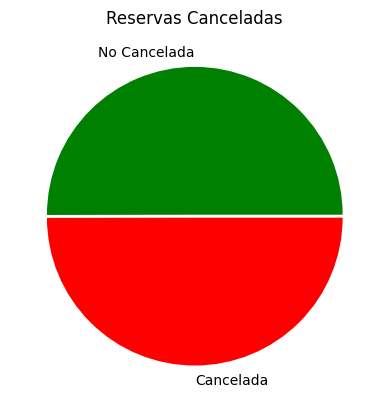

In [13]:
colors = ['green', 'red']
plt.pie(ds_hoteles_train["is_canceled_cat"].value_counts(), labels=ds_hoteles_train["is_canceled_cat"].value_counts().index, colors = colors, explode = (0.01, 0.01))
plt.title('Reservas Canceladas')
plt.show()

Tambien guardamos algunos datasets filtrados, por si estan cancelados o no las reservas y agregamos una columna de si esta cancelado de estilo categorica para poder utilizarlo en varios graficos

In [14]:
ds_reservas_canceladas = ds_hoteles_train.loc[ds_hoteles_train["is_canceled"] == 1]
ds_reservas_no_canceladas = ds_hoteles_train.loc[ds_hoteles_train["is_canceled"] == 0]
ds_hoteles_train["is_canceled"].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64


---

# 1) Variable ADR

Esta variable nos dice la tarifa promedio por día de cada reserva. Nos da una idea del precio por día de alojamiento. Es una variable del tipo cuantitativa, por lo que procedemos a analizar sus medidas de resumen(media, mediana, moda, etc).

In [15]:
columna_adr = ds_hoteles_train['adr']
columna_adr.value_counts()

62.00     2396
75.00     1502
90.00     1441
65.00     1204
80.00     1085
          ... 
109.71       1
72.09        1
41.97        1
210.67       1
131.47       1
Name: adr, Length: 6147, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles.

## Limpieza de datos (885 filas de valores invalidos, 0 o menor)
Veamos si la variable tiene valores restantes

In [16]:
columna_adr.isna().sum()

0

Esta variable no tiene datos faltantes. Sin embargo, este dato tambien se calcula mediante la division de la suma de los dias de todas las transacciones cuartos y el total de noches de estadia. Como es una sumatoria de precios, esta variable no deberia admitar valores menores o iguales a 0

In [17]:
(columna_adr > 0).value_counts()

True     61028
False      885
Name: adr, dtype: int64

Como podemos ver que alrededor de 885 valores, tiene valores menores o iguales a 0, lo cual implicaria que un cuarto de hotel basicamente es gratis o a la larga el cliente.

## Analisis y Visualizacion de datos

Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [18]:
columna_adr.describe()

count    61913.000000
mean       102.383773
std         47.757640
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

Visualizamos estas medidas en un boxplot

Text(0.5, 1.0, 'Boxplot ADR')

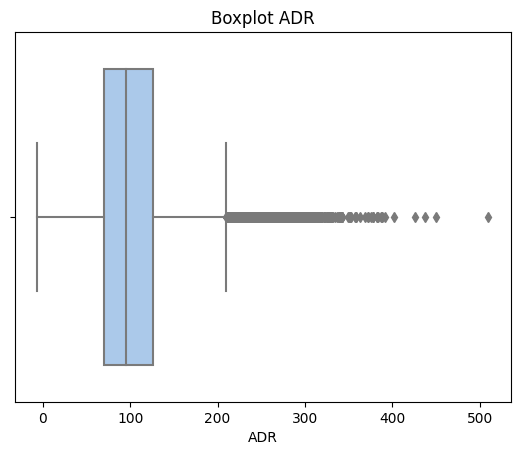

In [19]:
sns.boxplot(x = columna_adr, palette = "pastel")
plt.xlabel('ADR')

plt.title("Boxplot ADR")

Observamos que la gran mayoria de reservas tuvieron tarifas diarias que rondaron entre los 80 y 120 dólares, mientras que hay bastantes que superaban la barrera de los 200 dólares. Pero hay algo extraño, ya que el mínimo valor que toma esta variable es de -6.380000, y como hablamos de precios de alquiler de hoteles, es un valor que consideramos mal cargado.

Veamos más a fondo este/estos valores mal cargados

In [20]:
ds_adr_mal_cargado = ds_hoteles_train.loc[columna_adr <= 0]
ds_adr_mal_cargado.shape

(885, 32)

Observamos que hay 885 reservas con ADR menor o igual a 0, y los consideramos mal cargados por lo mismo de antes: estamos hablando del precio de alquiler por dia de un hotel, no pueden haber reservas que nos cuesten valores negativos o 0(creo que nadie nos reservaría uno o mas cuartos de hotel gratis). Entonces como conclusión, hay 885 reservas con estos valores de ADR que van a ser eliminadas porque no ayudan en nuestro análisis.

Nos interesa saber ahora si podemos encontrar algun dato de importancia para esas reservas que superaron los 200 dólares.

In [21]:
ds_adr_mayor_200 = ds_hoteles_train.loc[columna_adr > 200]
ds_adr_mayor_200.shape

(2574, 32)

Hay 2574 reservas que superaron una reserva diaria de 200, ahora vamos a ver la distribucion de esas reservas

In [22]:
ds_adr_mayor_200['adr'].describe()

count    2574.000000
mean      237.424433
std        33.566328
min       200.050000
25%       212.140000
50%       229.480000
75%       251.000000
max       510.000000
Name: adr, dtype: float64

Text(0.5, 0, 'ADR')

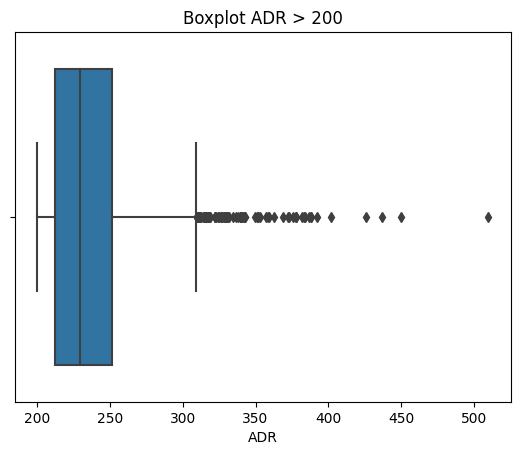

In [23]:
sns.boxplot(x = ds_adr_mayor_200["adr"])

plt.title("Boxplot ADR > 200")

plt.xlabel('ADR')

A estas reservas vamos a clasificarlas por el tipo de hotel

Text(0, 0.5, 'Tipo de hotel')

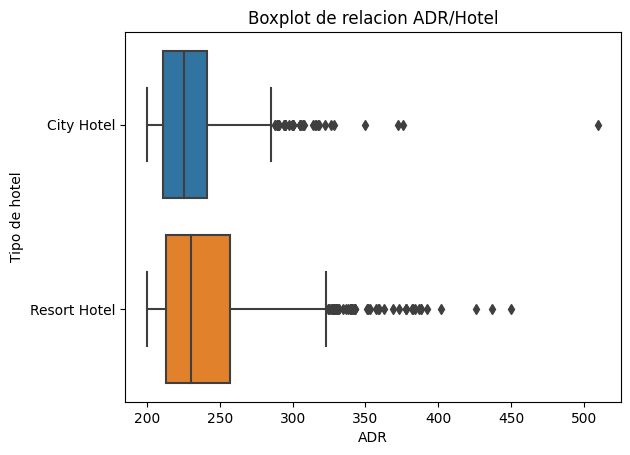

In [24]:
sns.boxplot(x = ds_adr_mayor_200["adr"], y = ds_adr_mayor_200["hotel"])

plt.title("Boxplot de relacion ADR/Hotel")

plt.xlabel('ADR')

plt.ylabel('Tipo de hotel')

Tomamos como conclusion que los hoteles del tipo Resort tuvieron reservas con ADR mas elevados en promedio que los del tipo City.

Vamos a partir de una hipotesis que nos puede dar un dato clave: ¿Qué relación hay entre las reservas que tuvieron un ADR mayor a 200 con las reservas canceladas?(suponiendo que al tener un valor elevado esto pudo haber generado más de una cancelación)

In [25]:
ds_adr_mayor_200['is_canceled'].value_counts()

1    1305
0    1269
Name: is_canceled, dtype: int64

Acordemosnos que, según la notación usada en el DataFrame, la variable is_canceled puede tomar dos valores: 1 si, finalmente la reserva fue cancelada y 0, si la reserva no fue cancelada.

([<matplotlib.axis.XTick at 0x7eb1bdac3ac0>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

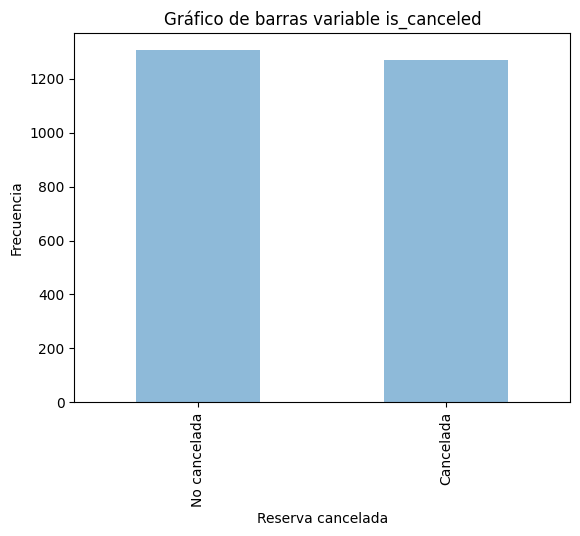

In [26]:
grf_ds= ds_adr_mayor_200['is_canceled'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable is_canceled" , xlabel="Reserva cancelada" , ylabel="Frecuencia")


plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Esto que obtuvimos tiene un valor muy grande: conseguimos ver que 1305 viajes con un adr mayor a 200 fueron cancelados.

Analizaremos el conjunto de datos donde el adr es menor que 200

In [27]:
ds_adr_menor_200 = ds_hoteles_train.loc[columna_adr < 200]
ds_adr_menor_200.shape

(59261, 32)

Existen 59261 reservas,por lo cual veremos como se comportan con las cancelaciones,lo que nos lleva a pensar en la posibilidad que a menor adr,las cancelaciones son mas concurrentes.
Vamos a ver la distribucion de esas reservas

In [28]:
ds_adr_menor_200['adr'].describe()

count    59261.000000
mean        96.389802
std         38.644260
min         -6.380000
25%         68.000000
50%         91.800000
75%        120.000000
max        199.860000
Name: adr, dtype: float64

Text(0.5, 0, 'ADR')

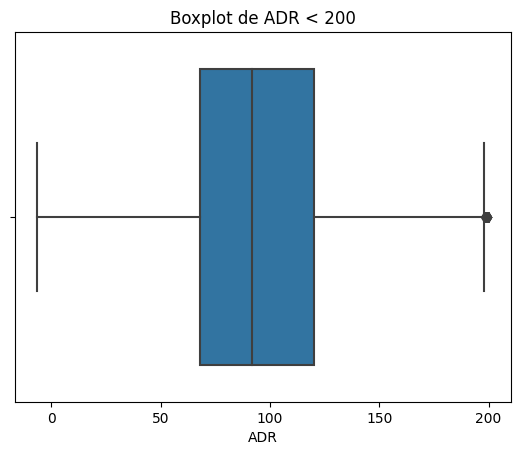

In [29]:
sns.boxplot(x = ds_adr_menor_200["adr"])


plt.title("Boxplot de ADR < 200")

plt.xlabel('ADR')

Notamos que hay valores negativos en la columna ADR,veamos cuantos son

In [30]:
ds_adr_menor_200.loc[ds_adr_menor_200['adr']< 0 ]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
21124,Resort Hotel,195,2017,March,10,5,4,6,2,0.0,...,273.0,NaN,0,Transient-Party,-6.38,0,0,869f627f-35fb-42b0-8376-12869739d76e,0,No Cancelada


Hay una reserva que tiene un ADR de valor -6.38,lo consideramos como un dato mal cargado,por lo cual seguimos con el analisis del conjunto de datos


In [31]:
ds_adr_menor_200['is_canceled'].value_counts()

0    29674
1    29587
Name: is_canceled, dtype: int64

Podemos notar a simple vista que se comporta de la misma manera que el aquellas reserva con adr mayor a 200.


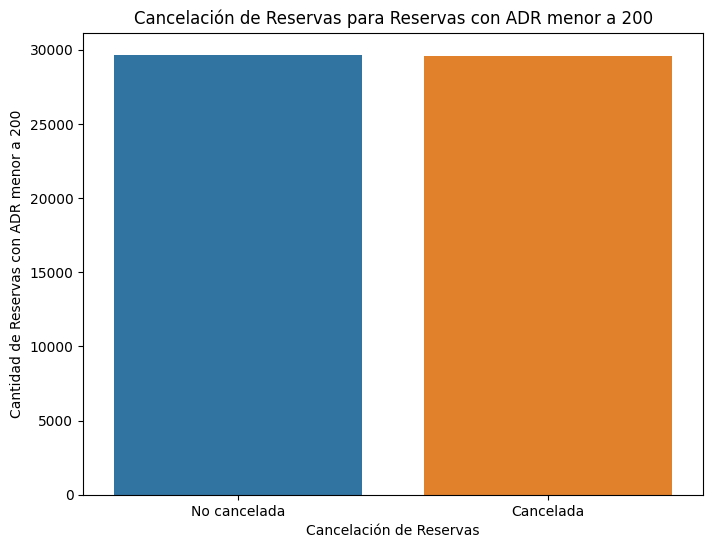

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adr_menor_200, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas con ADR menor a 200')
plt.title('Cancelación de Reservas para Reservas con ADR menor a 200')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

---

# 2, 3, 4) Variables Adults, Children y Babies
Estas variables del tipo cuantitativas las analizamos juntas para ver si podemos encontrar algún patrón para las reservas con muchas personas(quizás conformadas por grupos familiares), viendo también la cantidad de adultos, niños y bebés que tuvieron las mismas.

## Adults
Es una variable del tipo cuantitativas, son numeros enteros que representar la cantidad de adultos estan registrados en la reserva

In [33]:
columna_adults = ds_hoteles_train['adults']
columna_adults.value_counts()

2     46962
1     11549
3      3164
0       197
4        30
26        3
5         2
40        1
20        1
6         1
10        1
27        1
55        1
Name: adults, dtype: int64

Podemos observar que la gran mayoría de reservas tienen 2 adultos, mientras que hay muy pocas que tienen más de 10 adultos.

### Limpieza de datos (197 filas con un valor invalido de 0)

In [34]:
(columna_adults > 0).value_counts()

True     61716
False      197
Name: adults, dtype: int64

Como podemos ver, hay al menos 197 filas cargadas en el dataset que no tienen ningun adulto registrado en la reserva. Debido a este numero tan bajo, son estas filas son candidatas a ser eliminadas del dataset.


Veamos si además, tiene datos faltantes

In [35]:
columna_adults.isna().sum()

0

No tiene valores faltantes, pero tenemos el problema de esas reservas mal cargadas.

### Analisis Profundo y Visualizacion de los datos
Analicemos mas a fondo esta variable

Text(0, 0.5, 'Cantidad de reservas')

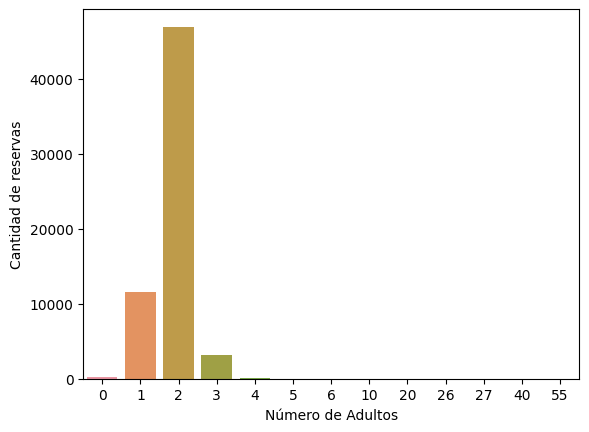

In [36]:
sns.countplot(data=ds_hoteles_train, x="adults")
plt.xlabel("Número de Adultos")
plt.ylabel("Cantidad de reservas")

Para visualizar mejor los datos, separaremos en 2 grupos:


*   Reservas con 1 a 3 adultos(mayor recurrencia en el dataset)
*   Reservas restantes(menor recurrencia en el dataset)






Comencemos con el primer grupo

In [37]:
ds_adultos_mas_recurrentes = ds_hoteles_train[(ds_hoteles_train['adults'] >= 1) & (ds_hoteles_train['adults'] <= 3)]

ds_adultos_mas_recurrentes['is_canceled'].value_counts()

1    30844
0    30831
Name: is_canceled, dtype: int64

Hay alrededor de 61500 reservas con estos valores para la variable adults

Veamos en un gráfico la relación entre estas reservas con valores recurrentes de adultos con la variable target is_canceled


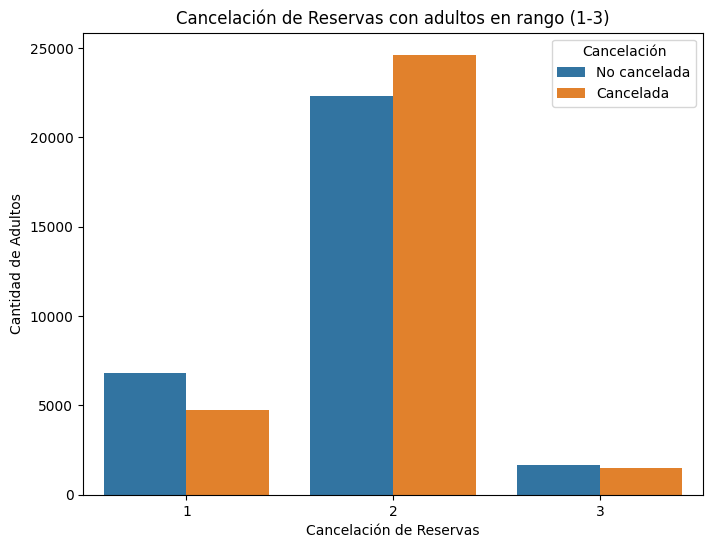

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adultos_mas_recurrentes, x='adults' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Adultos')
plt.title('Cancelación de Reservas con adultos en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Para reservas con 2 adultos, más de la mitad fueron canceladas, mientras que para reservas con 1 o 3 adultos casi la mitad de las mismas fueron canceladas. Podemos concluir entonces que para estos valores de la variable adults la mitad de los viajes van a ser cancelados.

In [39]:
ds_adultos_menos_recurrentes = ds_hoteles_train[ds_hoteles_train['adults'] >= 4]
ds_adultos_menos_recurrentes['is_canceled'].value_counts()

1    22
0    19
Name: is_canceled, dtype: int64

Hay 41 reservas con estos valores para la variable adults

Veamos en un gráfico la relación entre estas reservas con valores atípicos de adultos con la variable target is_canceled


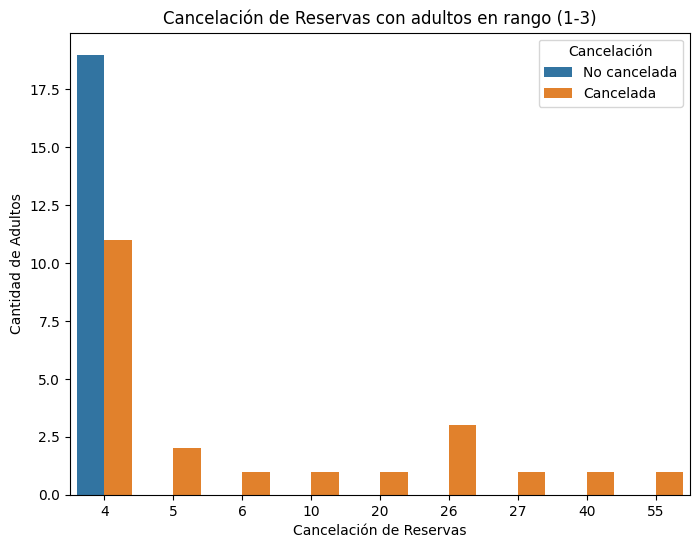

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adultos_menos_recurrentes, x='adults' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Adultos')
plt.title('Cancelación de Reservas con adultos en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que las reservas con más de 5 adultos han sido canceladas. Este dato es de vital importancia, porque podemos tomar la cantidad de adultos por reserva como un buen parámetro para hacer nuestras predicciones en un futuro.


---
## Variable Children
Variable cuantitativa que representa la cantidad de niños que estan presente en la reserva

### Limpieze de datos ( 4 filas que son na)
Empezamos por analizar los posibles valores que puede tomar este dato y si hay valores nulos dentro de la columna

In [41]:
columna_children = ds_hoteles_train['children']
columna_children.value_counts()

0.0     57457
1.0      2457
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

In [42]:
(columna_children >= 0).value_counts()

True     61909
False        4
Name: children, dtype: int64

In [43]:
columna_children.isna().sum()

4

Hay 4 filas, que no poseen valores dentro de la categoria children. Habra que ver en base al analisis si estos valores faltantes tienen que ser suplidos o eliminados

### Analisis de datos y Visualizaciones
Hay 4452 reservas que tuvieron niños.

Text(0, 0.5, 'Cantidad de reservas')

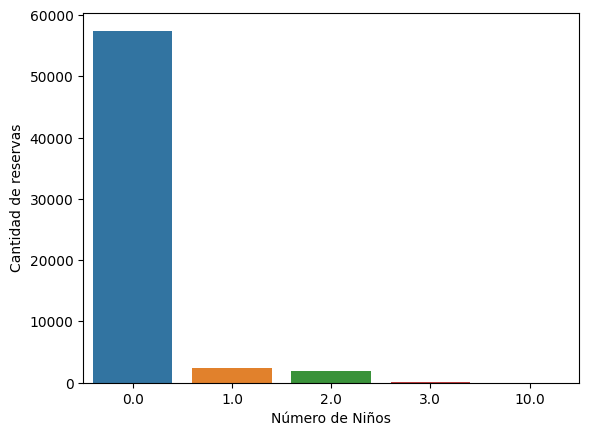

In [44]:
sns.countplot(data=ds_hoteles_train, x="children")
plt.xlabel("Número de Niños")
plt.ylabel("Cantidad de reservas")

Para visualizar mejor los datos,separaremos en 2 grupos:


*   Reservas sin niños(mayor recurrencia en el dataset)
*   Reservas con niños(menor recurrencia en el dataset)


Comenzemos con el primer grupo

In [45]:
ds_reservas_sin_niños= ds_hoteles_train.loc[columna_children == 0]
ds_reservas_sin_niños['is_canceled'].value_counts()

1    28736
0    28721
Name: is_canceled, dtype: int64

Veamos en un grafico

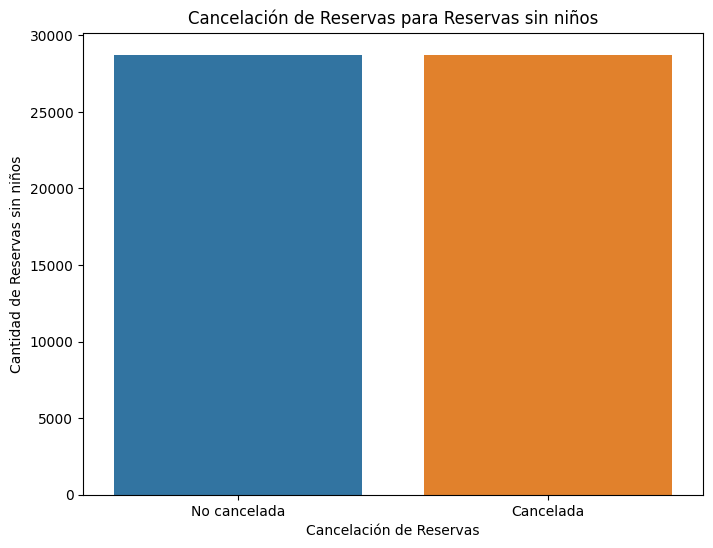

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_niños, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin niños')
plt.title('Cancelación de Reservas para Reservas sin niños')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos concluir entonces que para estos valores de la variable children la mitad de los viajes fueron cancelados.

Analicemos el proximo grupo

In [47]:
ds_reservas_con_niños= ds_hoteles_train.loc[columna_children > 0]


ds_reservas_con_niños['is_canceled'].value_counts()

0    2251
1    2201
Name: is_canceled, dtype: int64

Veamos en un grafico

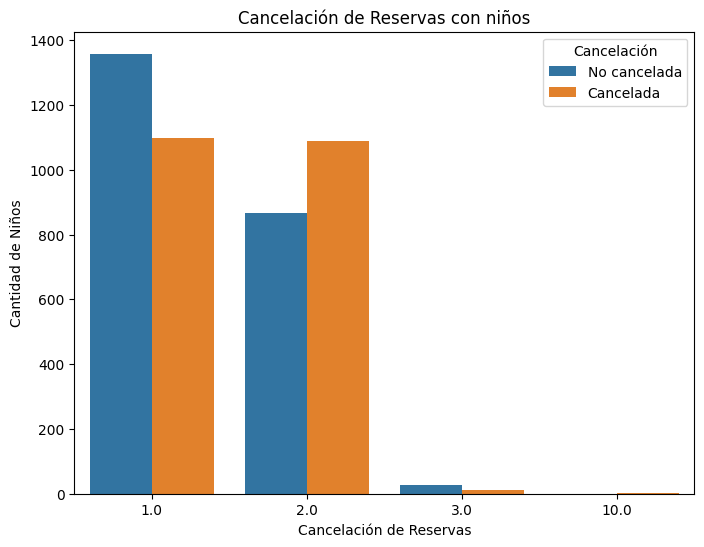

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_niños, x='children' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Niños')
plt.title('Cancelación de Reservas con niños')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que las reservas con 2 niños  han sido mas predominantes las canceladas. Mientras que en los otros valores nos indican que predominan las reservas no canceladas






---
## Variable Babies
Variable cuantitativa que indica la cantidad de bebes registrados en la reserva

### Limpieza de datos

In [49]:
columna_babies = ds_hoteles_train['babies']
columna_babies.value_counts()

0    61485
1      420
2        7
9        1
Name: babies, dtype: int64

In [50]:
columna_babies.loc[columna_babies > 0].value_counts().sum()

428

### Analisis y visualizacion de datos
Hay 428 reservas que tuvieron bebés a bordo.


Para visualizar mejor los datos,separaremos en 2 grupos:


*   Reservas sin bebés(mayor recurrencia en el dataset)
*   Reservas con bebés(menor recurrencia en el dataset)


Comencemos con el primer grupo

In [51]:
ds_reservas_sin_bebes = ds_hoteles_train.loc[columna_babies == 0]
ds_reservas_sin_bebes['is_canceled'].value_counts()

1    30813
0    30672
Name: is_canceled, dtype: int64

Veamos en un grafico

([<matplotlib.axis.XTick at 0x7eb1bd8703d0>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

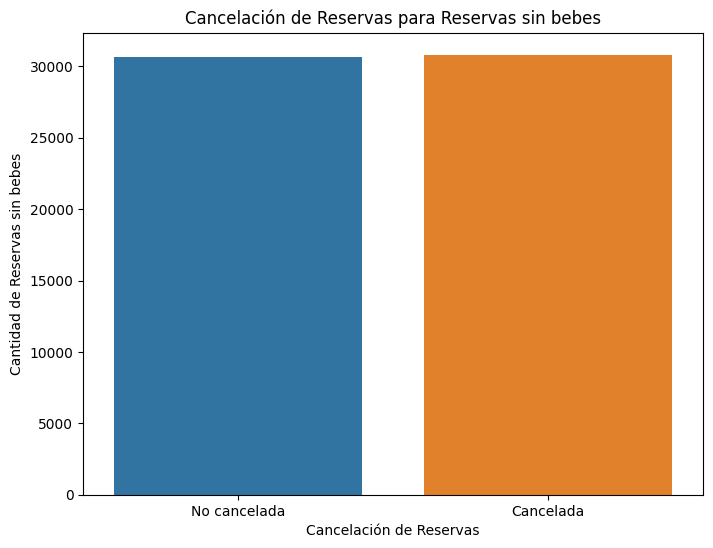

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_bebes, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin bebes')
plt.title('Cancelación de Reservas para Reservas sin bebes')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Podemos concluir entonces que para estos valores de la variable babies la mitad de los viajes fueron cancelados.

Ahora continuamos con el otro grupo

In [53]:
ds_reservas_con_bebes = ds_hoteles_train.loc[columna_babies > 0]
ds_reservas_con_bebes['is_canceled'].value_counts()

0    300
1    128
Name: is_canceled, dtype: int64

Veamos como se distribuye

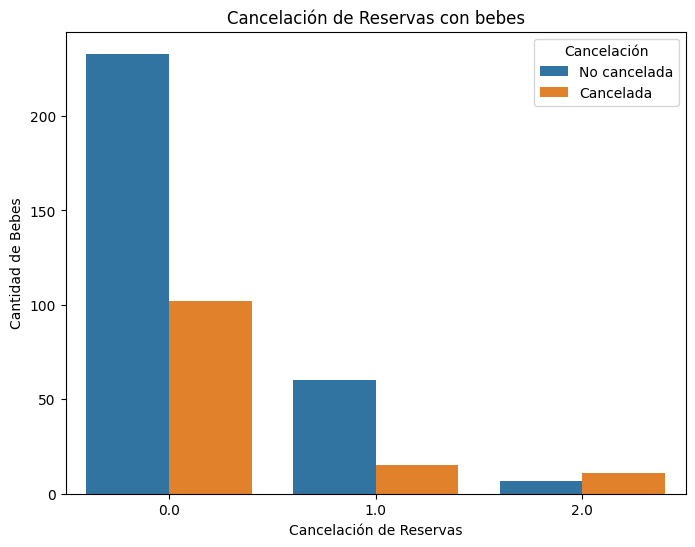

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_bebes, x='children' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Bebes')
plt.title('Cancelación de Reservas con bebes')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()


Observamos que las reservas con 2 bebes han sido mas predominantes las canceladas. Mientras que en los otros valores nos indican que predominan las reservas no canceladas


# 5) Variable Agent
Es una variable de tipo cualitativa, que expresa el ID de la agencia de viajes que realizó la reserva. Como estamos hablando de IDs, no deberíamos tener IDs con valores menores o iguales a 0.

## Limpieza de datos ( 7890 datos faltantes, candidatos a ser rellenados con un id dummy)
Veamos que posibles valores puede tomar

In [55]:
columna_agent= ds_hoteles_train['agent']

columna_agent.value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

Antes de comenzar, veamos si presenta algun valor nulo

In [56]:
columna_agent.isna().sum()

7890

Existen una gran cantidad de datos faltantes. Debido a la gran cantidad de datos faltantes, cerca de un 10% de los datos totales del dataset, se tendria que considerar un valor dummy para poder cargar los datos invalidos para que luego sean ignorados durante el analisis.

Ahora, comprobemos que no posean datos mal cargados(esto es, que no hayan IDs menores o iguales a 0)

In [57]:
ds_agent_mal_cargados = ds_hoteles_train.loc[columna_agent <= 0]
ds_agent_mal_cargados.shape

(0, 32)

No poseemos IDs que cumplan esas características, por lo que concluimos que esta variable no tiene valores mal cargados.

## Analisis y visualizacion de datos
Miremos ahora el top 10 de agentes con más reservas asignadas, ya que, cuando vimos los valores que la variable podía tomar habían más de 296 IDs.

<Axes: title={'center': 'Top 10 agentes con mayores reservas'}>

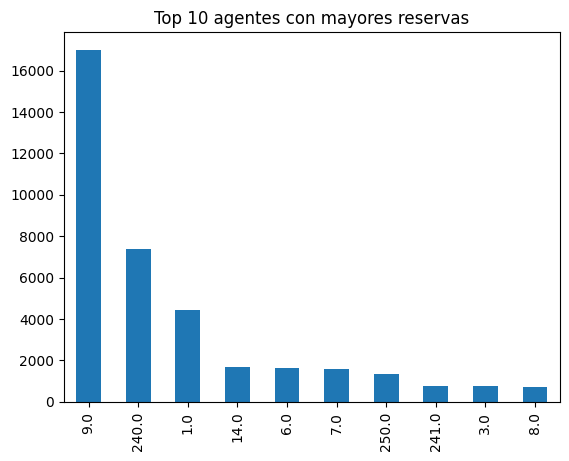

In [58]:
top_10_agents = (ds_hoteles_train['agent'].value_counts()).iloc[:10]

top_10_agents.plot(kind='bar', title='Top 10 agentes con mayores reservas')

Vemos que, por amplia diferencia, el agente con ID de 9.0 es la que mayor cantidad de reservas recibió.

Obtengamos los ID de las agencias con mayor cantidad de reservas canceladas y las que no

In [59]:
cancelaciones_por_agencia = ds_hoteles_train.groupby('agent')['is_canceled'].sum().reset_index()
cancelaciones_por_agencia = cancelaciones_por_agencia.sort_values(by='is_canceled', ascending=False)

Con respecto a las mas canceladas

In [60]:
agencias_mas_cancelaciones = cancelaciones_por_agencia.head(10)
agencias_mas_cancelaciones

,agent,is_canceled
8,9.0,9295
159,240.0,3880
0,1.0,3671
5,6.0,689
17,19.0,560
2,3.0,527
35,37.0,505
13,14.0,435
19,21.0,380
168,250.0,363


Visualizamos en un gráfico el top 10 de agentes con más cancelaciones de viajes

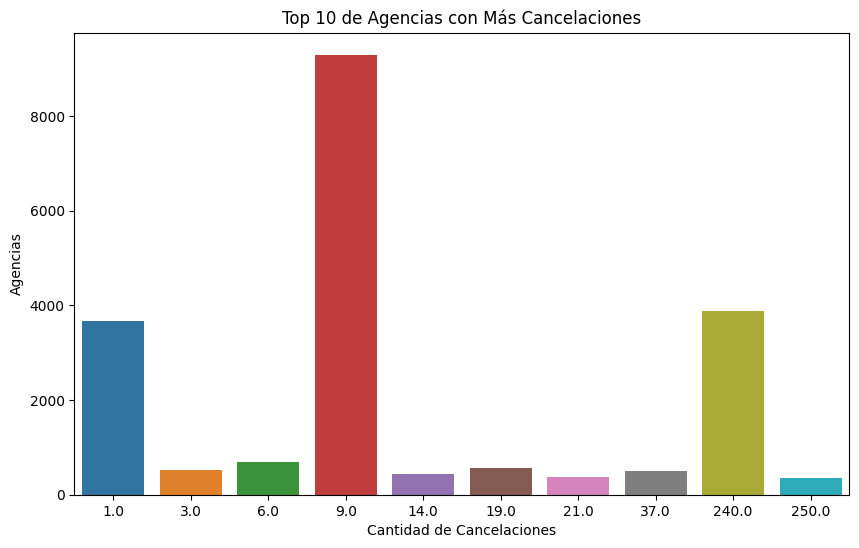

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agencias_mas_cancelaciones, x='agent', y='is_canceled')
plt.xlabel('Cantidad de Cancelaciones')
plt.ylabel('Agencias')
plt.title('Top 10 de Agencias con Más Cancelaciones')

plt.show()

Podemos declinarnos a pensar que las reservas asociadas a ese agente pueden tener mayor posibilidad de cancelarse,mientras que las restantes podrian tener mayor posibilidad de no cancelarse


Veamos la relación de esta variable con el target

In [62]:
tasa_cancelacion_por_agencia = ds_hoteles_train.groupby("agent")["is_canceled"].mean() * 100

tasa_cancelacion_por_agencia = tasa_cancelacion_por_agencia.reset_index()

tasa_cancelacion_por_agencia = tasa_cancelacion_por_agencia.sort_values(by="is_canceled", ascending=False)
tasa_cancelacion_por_agencia

,agent,is_canceled
277,472.0,100.0
188,286.0,100.0
255,420.0,100.0
55,64.0,100.0
47,55.0,100.0
...,...,...
212,324.0,0.0
210,321.0,0.0
86,106.0,0.0
90,112.0,0.0


In [63]:
media_tasa_cancelacion = tasa_cancelacion_por_agencia["is_canceled"].mean()

print("La media de la tasa de cancelación entre todas las agencias es:", media_tasa_cancelacion)

La media de la tasa de cancelación entre todas las agencias es: 34.62657937558843


Las agencias con tasas de cancelación más altas tienden a tener una propensión mayor a cancelar reservas en comparación con las agencias con tasas más bajas,por lo cual lo considero un variable muy importante para el analisis



---

# 6, 7, 8, 9) Variables arrival Date, Week, Month and Year




## Variable Arrival Date

Esta es una variable cuantitativa, y como su nombre indica, hace referencia al día del mes de la fecha de llegada.

### Limpieza de datos
Vemos todos los valores posibles que puede llegar a tomar la columna y si tiene valores invalidos cargados

In [64]:
columna_arrival_date = ds_hoteles_train['arrival_date_day_of_month']
columna_arrival_date.value_counts()

17    2305
5     2274
15    2196
16    2182
9     2168
26    2151
12    2123
25    2110
28    2082
2     2078
20    2078
19    2075
24    2070
8     2057
3     2036
30    2033
18    2025
27    2015
14    2008
6     1965
7     1951
4     1939
1     1907
13    1902
21    1898
22    1883
29    1848
23    1842
10    1812
11    1773
31    1127
Name: arrival_date_day_of_month, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles.Veamos si contiene valores faltantes

In [65]:
columna_arrival_date.isna().sum()

0

sta variable no tiene ningun valor faltante. Ahora revisamos que esten dentro de un rango valido, desde el dia 1 del mes, principio de mes, hasta el dia 31, de fin de mes

In [66]:
columna_arrival_date.between(1,31).value_counts()

True    61913
Name: arrival_date_day_of_month, dtype: int64

Vemos que todos los valores estan dentro de un rango valido de dias por lo que podemos continuar con nuestro analisis


### Analisis y Visualizacion de datos
Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [67]:
columna_arrival_date.describe()

count    61913.000000
mean        15.785812
std          8.795489
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

Visualicemos en un boxplot los datos

Text(0.5, 1.0, 'Boxplot Arrival Date Day Of Month')

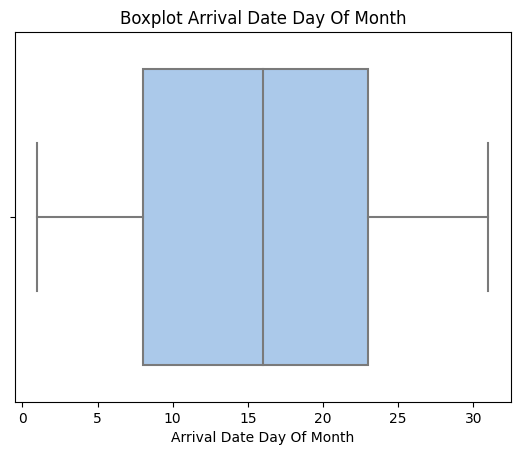

In [68]:
sns.boxplot(x = columna_arrival_date, palette = "pastel")
plt.xlabel('Arrival Date Day Of Month')

plt.title("Boxplot Arrival Date Day Of Month")

Podemos notar que la distribucion ,nos presenta que no existe ningun valor mal cargado,ni fuera de los rangos posibles de dias del mes.

Text(0, 0.5, 'Cantidad de reservas')

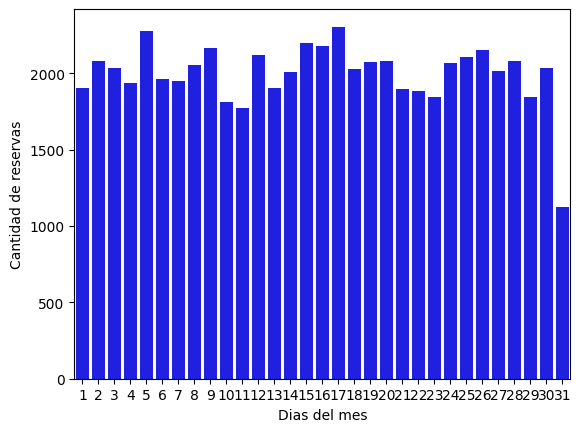

In [69]:
sns.countplot(data=ds_hoteles_train, x="arrival_date_day_of_month",color= 'blue')
plt.xlabel("Dias del mes")
plt.ylabel("Cantidad de reservas")

Veamos que dias son los que tienen mas cancelaciones asociadas

In [70]:
cancelaciones_por_dia = ds_hoteles_train.groupby('arrival_date_day_of_month')['is_canceled'].sum().reset_index()
cancelaciones_por_dia = cancelaciones_por_dia.sort_values(by='is_canceled', ascending=False)

dias_con_mas_cancelaciones = cancelaciones_por_dia.head(5)
dias_con_mas_cancelaciones

,arrival_date_day_of_month,is_canceled
16,17,1293
4,5,1177
14,15,1159
25,26,1155
7,8,1149


Podemos notar que los dias que mas cancelaciones tuvieron estan dispersos en todo su rango,tanto dias del principio hasta el final de mes


---
## Variable  ArrivalDateMonth

Esta es una variable cualitativa(categorica), y como su nombre indica, hace referencia al mes de la fecha de llegada.


Veamos como se distribuyen ,para poder comenzar un analisis


### Limpieza de datos

In [71]:
columna_arrival_date_month = ds_hoteles_train['arrival_date_month']
columna_arrival_date_month.value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

Veamos si contiene valores faltantes

In [72]:
columna_arrival_date_month.isna().sum()

0

No hay valores nulos por lo cual podemos continuar con nuestro analisis

### Analisis y Visualizacion de graficos
Veamos estos datos en un grafico para poder notar las distribuciones

<Axes: title={'center': 'Meses con cantidad de reservas'}>

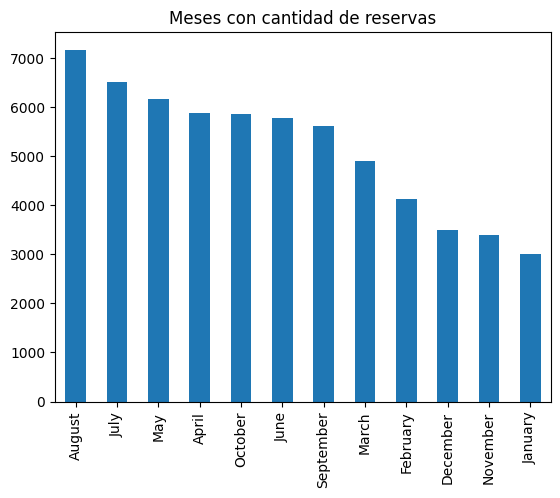

In [73]:
ds_hoteles_train['arrival_date_month'].value_counts().plot(kind='bar', title='Meses con cantidad de reservas')

Dado que no tiene ningun dato faltante,y los datos estan dentro de lo esperado,veamos los paises con mayor cancelacion de reservas

In [74]:
cancelaciones_por_mes = ds_hoteles_train.groupby('arrival_date_month')['is_canceled'].sum().reset_index()
cancelaciones_por_mes = cancelaciones_por_mes.sort_values(by='is_canceled', ascending=False)

cancelaciones_por_mes

,arrival_date_month,is_canceled
1,August,3612
5,July,3339
8,May,3264
6,June,3169
0,April,3127
10,October,2969
11,September,2909
7,March,2219
3,February,1897
2,December,1687


Podemos notar como los datos obtenidos de los meses con mayor cantidad de reservas,se asemejan en gran parte a los meses con mayor reservas canceladas

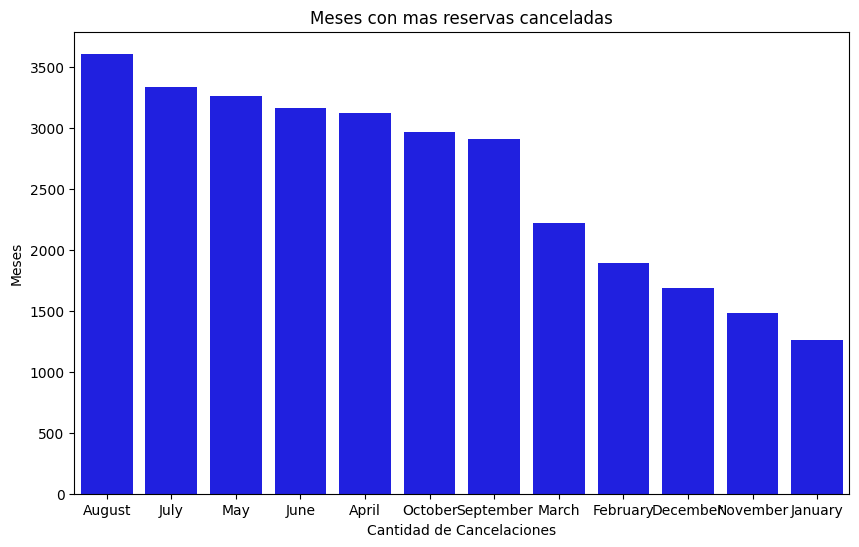

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cancelaciones_por_mes, x='arrival_date_month', y='is_canceled', color='blue')
plt.xlabel('Cantidad de Cancelaciones')
plt.ylabel('Meses')
plt.title('Meses con mas reservas canceladas')

plt.show()

Por ultimo,analizemos que meses tienen mayor tasa de cancelacion,ya que odemos declinarnos a pensar que las reservas asociadas a los meses con mas cancelaciones tienden a cancelar mas;por lo cual ,veamos la tasa de cancelacion por mes

In [76]:
tasa_cancelacion_por_mes = ds_hoteles_train.groupby("arrival_date_month")["is_canceled"].mean() * 100

tasa_cancelacion_por_mes = tasa_cancelacion_por_mes.reset_index()

tasa_cancelacion_por_mes = tasa_cancelacion_por_mes.sort_values(by="is_canceled", ascending=False)
tasa_cancelacion_por_mes

,arrival_date_month,is_canceled
6,June,54.902980
0,April,53.198367
8,May,52.995616
11,September,51.770778
5,July,51.180258
10,October,50.639604
1,August,50.334448
2,December,48.296593
3,February,45.987879
7,March,45.294958


In [77]:
media_tasa_cancelacion_mes = tasa_cancelacion_por_mes["is_canceled"].mean()

print("La media de la tasa de cancelación entre todos los meses es:", media_tasa_cancelacion_mes)

La media de la tasa de cancelación entre todos los meses es: 49.19615093189964


Los con tasas de cancelación más altas(June,April..) tienden a tener una propensión mayor a cancelar reservas en comparación con los meses con tasas más bajas(January,November,...),por lo cual puede ser de gran importancia al momento de entrenar al modelo



---
## Variable ArrivalDateWeekNumber
Es una variable cuanitativa,representa el número de semana de la fecha de llegada.

### Limpieza de datos (969 valores fuera del rango de cantidad de semanas dentro de un año)
Comenzamos por ver la cantidad de valores posibles que puede tomar la variable, si hay algun valor nulo cargado y si los valores estan dentro del rango esperado de semanas dentro de un año

In [78]:
columna_arrival_date_week = ds_hoteles_train['arrival_date_week_number']
columna_arrival_date_week.value_counts()

33    1876
18    1611
30    1609
32    1600
17    1547
34    1533
28    1490
21    1467
20    1464
38    1456
42    1449
41    1449
29    1424
25    1412
31    1397
15    1385
22    1370
39    1368
23    1362
27    1359
24    1354
35    1305
40    1271
13    1257
16    1250
26    1232
43    1224
19    1196
14    1189
44    1170
8     1170
37    1166
36    1166
10    1085
9     1082
7     1073
45    1037
11    1028
12     995
53     969
49     915
46     837
47     788
50     781
6      735
4      733
48     721
3      668
5      655
2      642
52     575
1      552
51     464
Name: arrival_date_week_number, dtype: int64

Podemos notar que esta variable esta relacionada con el mes del año correspondinte al numero de la semana,por lo cual el analisis de esta variable tendra resultados similares a los de la variable ArrivalMonth

Veamos si tiene algun valor faltante

In [79]:
columna_arrival_date_week.isna().sum()

0

No tiene ningun valor nulo, ahora revisemos si tiene valores dentro de un rango valido. Los valores dentro del rango son de 1 a 52, la cantidad de semanas dentro de un año

In [80]:
columna_arrival_date_week.between(1,52).value_counts()

True     60944
False      969
Name: arrival_date_week_number, dtype: int64

En este caso podemos observar, que hay 969 valores dentro de la columna que no corresponden a ninguna semana dentro de la cantidad de semanas que tiene un año, habra que ver si se desea computar estos valores de otra forma o eliminar las filas o si es un valor necesario para el analisis

### Analisis y Visualizacion de datos
Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [81]:
columna_arrival_date_week.describe()

count    61913.00000
mean        27.21808
std         13.52601
min          1.00000
25%         16.00000
50%         28.00000
75%         38.00000
max         53.00000
Name: arrival_date_week_number, dtype: float64

Veamos estos valores en un boxplot

Text(0.5, 1.0, 'Boxplot Arrival Date Week')

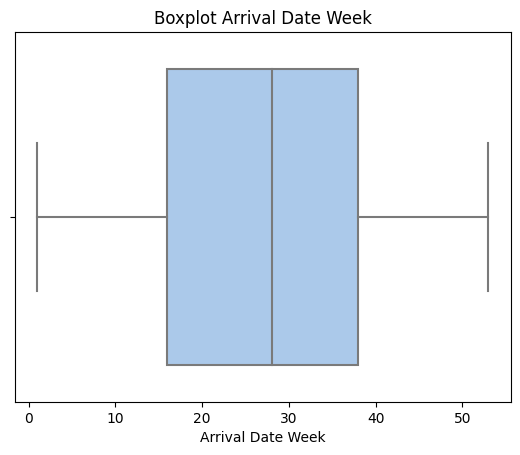

In [82]:
sns.boxplot(x = columna_arrival_date_week, palette = "pastel")
plt.xlabel('Arrival Date Week')

plt.title("Boxplot Arrival Date Week")

Ningun valor es atipico,ni esta fuera de los rangos esperados



---
## Variable ArrivalDateYear
Es una variable cuantitativa,que refiere al año de la llegada en la reserva

### Limpieza de datos
Comenzamos por la cantidad de valores posibles que puede tomar y si hay valores nulos

In [83]:
columna_arrival_date_year = ds_hoteles_train['arrival_date_year']
columna_arrival_date_year.value_counts()

2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64

Notamos que solo existen 3 posibles años de analisis,por lo cual antes de seguir con el analisis,veamos si tiene algun valor faltante

In [84]:
columna_arrival_date_year.isna().sum()

0

### Analisis y Visualizacion de datos
Ya que no existe ningun valor faltante,veamos como las cancelaciones se distribuyen en los distintos años

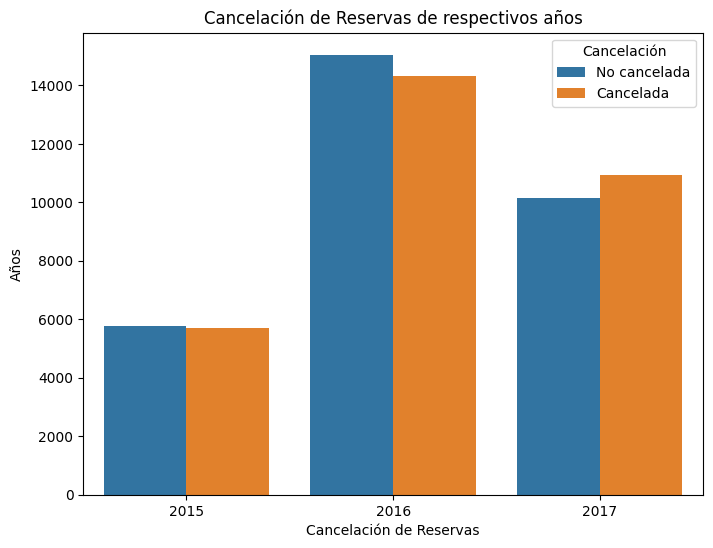

In [85]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train, x='arrival_date_year' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Años')
plt.title('Cancelación de Reservas de respectivos años')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

# 10) Variable AssignedRoomType

## Limpieza de datos
Comenzamos por ver todos los valores posibles que puede tomar esta variable y si hay valores sin cargar

In [86]:
columna_room_type = ds_hoteles_train['assigned_room_type']

columna_room_type.value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

Al parecer, esta variable toma valores de caracteres.

Veamos si tiene datos faltantes

In [87]:
columna_room_type.isna().sum()

0

No tenemos datos faltantes para esta variable.

## Analisis y Visualizacion de datos
Observemos en un gráfico cómo se distribuyen los valores que toma la variable.

<Axes: title={'center': 'Cantidad de reservas según el tipo de habitación asignado'}>

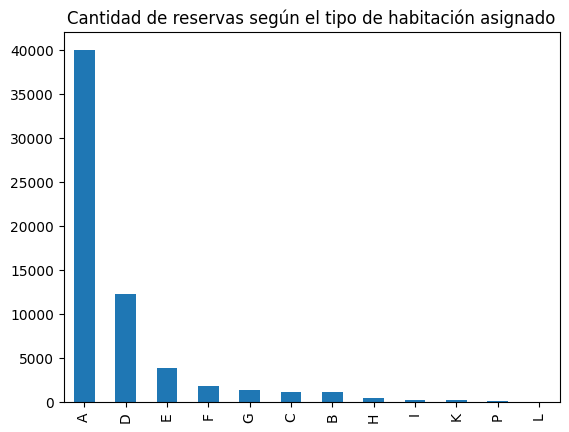

In [88]:
room_type_graph = (ds_hoteles_train['assigned_room_type'].value_counts())

room_type_graph.plot(kind='bar', title='Cantidad de reservas según el tipo de habitación asignado')

Vemos que por mucha diferencia el tipo de habitación A es el más frecuente para esta variable.

# 11) Variable Booking Changes
Es una variable que describe el número de cambios/enmiendas realizadas a la reserva desde el momento en que la reserva se introdujo en el PMS hasta el momento del check-in o cancelación

## Limpeza de datos
Comenzamos viendo los valores que toma esta variable y ver si toma valores nulos y si estan dentro de un rango valido

In [89]:
columna_booking_changes = ds_hoteles_train['booking_changes']
columna_booking_changes.value_counts()

0     53596
1      5821
2      1795
3       407
4       164
5        58
6        32
7        16
8        10
13        3
10        3
9         2
14        2
12        1
15        1
17        1
11        1
Name: booking_changes, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles, asi que vamos a ver si para esta variable hay datos faltantes en un principio

In [90]:
columna_booking_changes.isna().sum()

0

In [91]:
(columna_booking_changes >= 0).value_counts()

True    61913
Name: booking_changes, dtype: int64

Esta variable no tiene datos faltantes, esto nos beneficia a la hora de hacer nuestro análisis.

## Analisis y Visualizacion
Ahora,dado que es una variable cuantitativa, veremos las medidas de resumen, como la media, mediana, moda, etc..

In [92]:
columna_booking_changes.describe()

count    61913.000000
mean         0.195952
std          0.610519
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

Veo que predominan las reservas que no tuvieron ningun cambio,pero veamos aquellas que si tuvieron


In [93]:
ds_reservas_con_cambios = ds_hoteles_train.loc[columna_booking_changes > 0]
ds_reservas_con_cambios['booking_changes'].describe()

count    8317.000000
mean        1.458699
std         0.965809
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: booking_changes, dtype: float64

Lo visualizo en un bloxplot

Text(0.5, 1.0, 'Boxplot de la variable booking_changes')

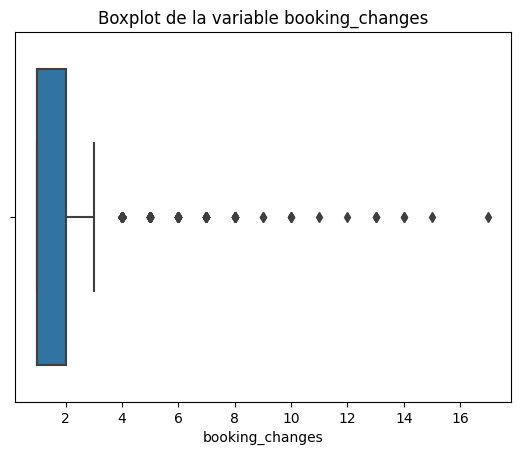

In [94]:
sns.boxplot(x = ds_reservas_con_cambios['booking_changes'])
plt.title("Boxplot de la variable booking_changes")

Observamos que la mayoría de reservas tienen de 0 a 2 cambios en las mismas, mientras que tenemos algunas reservas con más de 3 cambios

Veamos la relacion con is_canceled

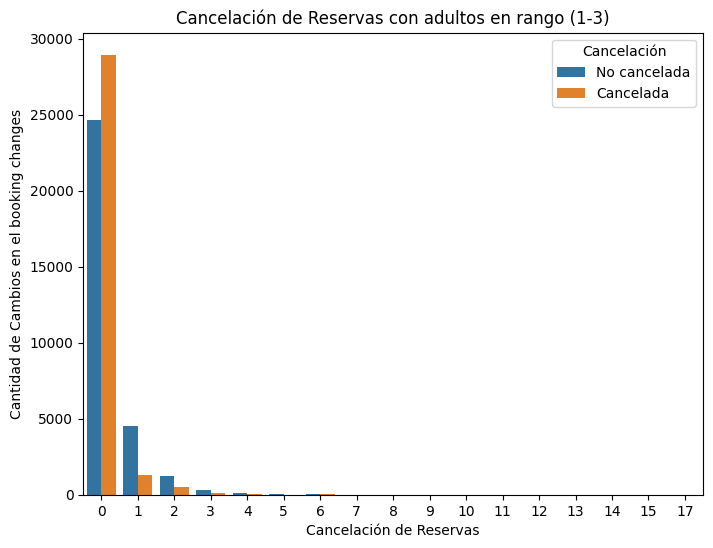

In [95]:

plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Cambios en el booking changes')
plt.title('Cancelación de Reservas con adultos en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()


Para poder comprender y visualizar mejor el grafico,vamos a separarlo en 3 grupos


*   Reservas sin cambios
*  Reservas que tienen entre 1 y 4 cambios
*   Reservas con mas de 4 cambios



---

Vamos a comenzar con las reservas sin cambios



In [96]:
ds_reservas_sin_cambios = ds_hoteles_train.loc[columna_booking_changes == 0]
ds_reservas_sin_cambios['is_canceled'].value_counts()

1    28949
0    24647
Name: is_canceled, dtype: int64

Veamos en un gráfico la relación entre estas reservas csin cambios con la variable target is_canceled


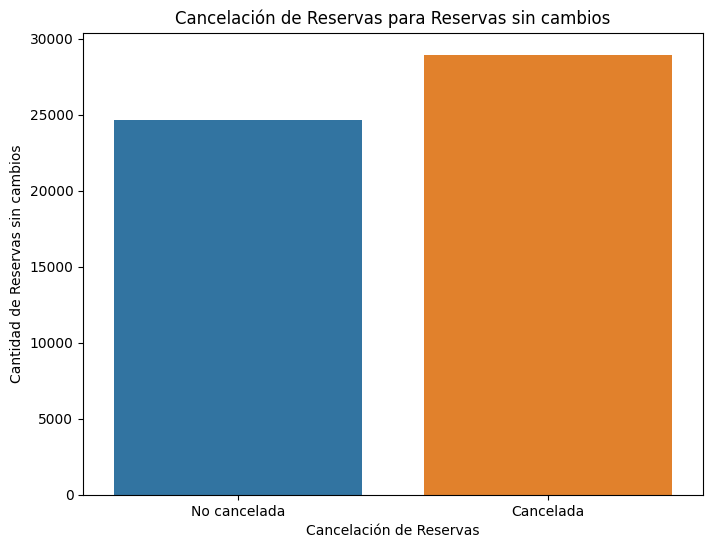

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_cambios, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin cambios')
plt.title('Cancelación de Reservas para Reservas sin cambios')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar como las cancelaciones son mas concurrentes ,por lo cual puede ser un indicio importante para el analisis


---

Veamos el siguiente grupo

In [98]:
ds_reservas_con_1_a_3_cambios = ds_hoteles_train[(ds_hoteles_train['booking_changes'] >= 1) & (ds_hoteles_train['booking_changes'] <= 3)]
ds_reservas_con_1_a_3_cambios['is_canceled'].value_counts()

0    6117
1    1906
Name: is_canceled, dtype: int64

Grafiquemos los valores

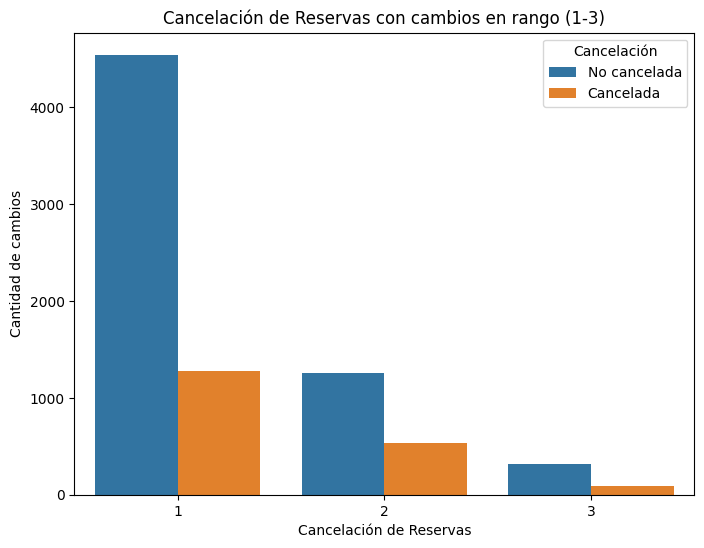

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_1_a_3_cambios, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de cambios')
plt.title('Cancelación de Reservas con cambios en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Podemos notar que predomina las reservas no canceladas,pero a medida que va bajando la cantidad de cambios,se acercan cada vez mas cerca,veamos el ultimo grupo

In [100]:
ds_reservas_con_4_o_mas_cambios = ds_hoteles_train[(ds_hoteles_train['booking_changes'] >= 4) ]

ds_reservas_con_4_o_mas_cambios['is_canceled'].value_counts()

0    208
1     86
Name: is_canceled, dtype: int64

Veamos en graficos para comprender la distribucion

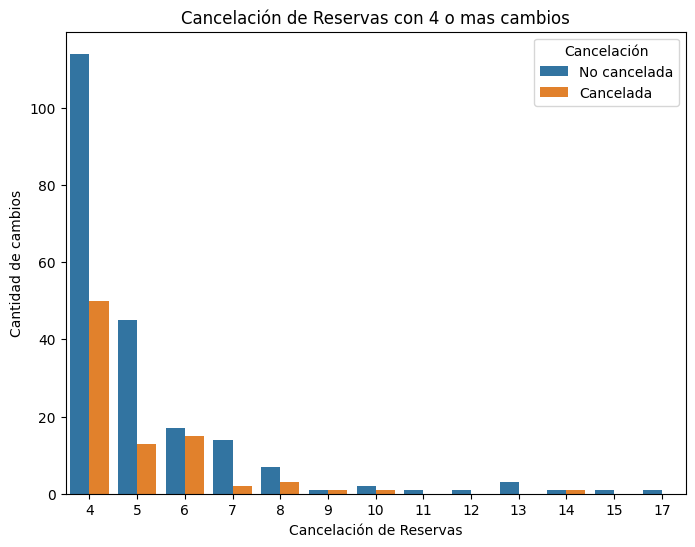

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_4_o_mas_cambios, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de cambios')
plt.title('Cancelación de Reservas con 4 o mas cambios')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Por último con este gráfico notamos que con cambios, las reservas suelen ser menos canceladas en la mayoría de sus casos, mientras que sin cambios, las cancelaciones son mayores

Como conclusión para nuestro análisis, tomamos como dato de que, a mayor cantidad de cambios en las reservas, menos probabilidad hay de que las mismas sean canceladas.



---

# 12) Variable company

Esta variable contiene el ID de la empresa responsable del booking de las reservas. En nuestro análisis del dataset en general, esta columna era la que más datos faltantes tenía, por lo que por ahora es una buena candidata a ser analizada para nuestro análisis.

## Limpieza de datos

In [102]:
columna_company = ds_hoteles_train['company']
columna_company.value_counts().sum()

3152

In [103]:
columna_company.isna().sum()

58761

Vemos que hay 3152 reservas con la variable company completa(hay más de 58000 reservas con la variable vacía).

## Analisis y visualizacionde de datos
Como los valores que toma esta variable son IDs, termina siendo una variable categórica, por lo que vamos a ver qué ID son los más repetidos(es decir, qué empresas se hacen responsables de la mayor cantidad de reservas).

In [104]:
ds_reservas_con_company = ds_hoteles_train.loc[columna_company.notnull()]
ds_reservas_con_company['company'].value_counts()

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64

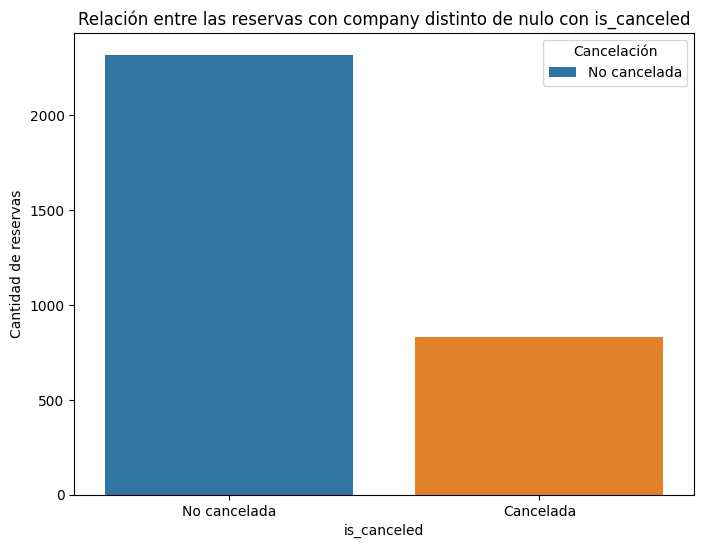

In [105]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_company, x='is_canceled')
plt.ylabel('Cantidad de reservas')
plt.title('Relación entre las reservas con company distinto de nulo con is_canceled')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que la gran mayoría de reservas que tuvieron una compañía responsable del booking no fueron canceladas; igualmente, debemos tener en cuenta de que un buen porcentaje de ellas(casi un 25%), fueron efectivamente canceladas.

Como conclusión final para esta variable, deberíamos tener en cuenta de que hay muchas reservas que no tienen este campo completo, y eso la puede hacer una buena candidata a ser eliminada en un futuro.

# 13) Variable country
Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia al país de origen de la reserva.

## Limpieza de datos (221 filas con valores na, ver si hay que reemplazarlos o eliminar las filas)
Empezamos por ver cuantos valores puede tomar la columna y si tiene valores nulos cargados

In [106]:
columna_country = ds_hoteles_train['country']
columna_country.value_counts().sum()

61692

In [107]:
columna_country.isna().sum()

221

Observamos(y también lo vimos en el análisis inicial del dataset) que esta variable cuenta con 221 datos faltantes. Teniendo en cuenta la cantidad de filas(reservas) que hay en el dataset, estos datos faltantes parecerían no generar tantos problemas a la hora de hacer nuestro análisis.

In [108]:
columna_country.value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

## Analisis y visualizacion de datos
Vamos a ver en un gráfico los 10 países con mayores cantidades de reservas

<Axes: title={'center': 'Top 10 países con mayores reservas'}>

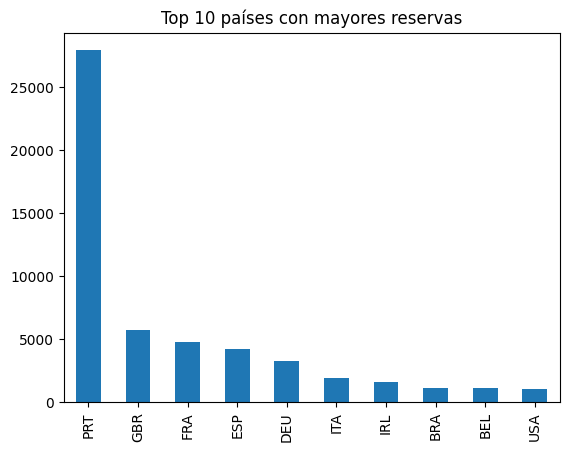

In [109]:
top_10_countries = (ds_hoteles_train['country'].value_counts()).iloc[:10]

top_10_countries.plot(kind='bar', title='Top 10 países con mayores reservas')

Observamos que PRT(Portugal según la regla usada) es el país con mayor cantidad de reservas.

# 14) Variable CustomerType
Esta variable se refiere al tipo de reservas que se realizaron, es una variable cualitativa.

## Limpieza de datos
Comenzamos por la cantidad de valores posibles que puede tomar la variable y si hay valores nulos cargados

In [110]:
ds_hoteles_train['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

In [111]:
ds_hoteles_train['customer_type'].isna().sum()

0

Vemos que esta variable esta bien cargado y no posee datos mal cargaods

## Analisis y visualizacion de datos
Utilizamos un grafico de torta para poder visualizar mejor su distribucion:

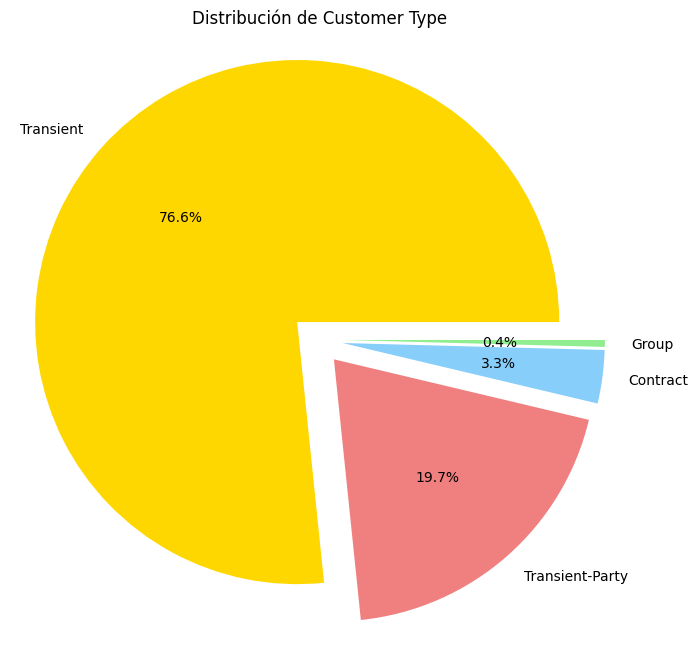

In [112]:
customer_type_counts = ds_hoteles_train['customer_type'].value_counts()

# Configuración para hacer que el gráfico de torta sea más legible
explode = (0.1, 0.1, 0.1, 0.1)  # Separación de las porciones
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colores
# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('Distribución de Customer Type')
plt.axis('equal')  # Hace que el gráfico de torta sea circular
plt.show()

Teniendo en cuenta la distribución de la variable, vamos a ver cómo se relaciona esta variable con la variable target(is_canceled)

Sabiendo que el valor 'transient' es el más recurrente en el dataset, vamos a ver con qué frecuencia las reservas con este valor en customer_type son canceladas o no

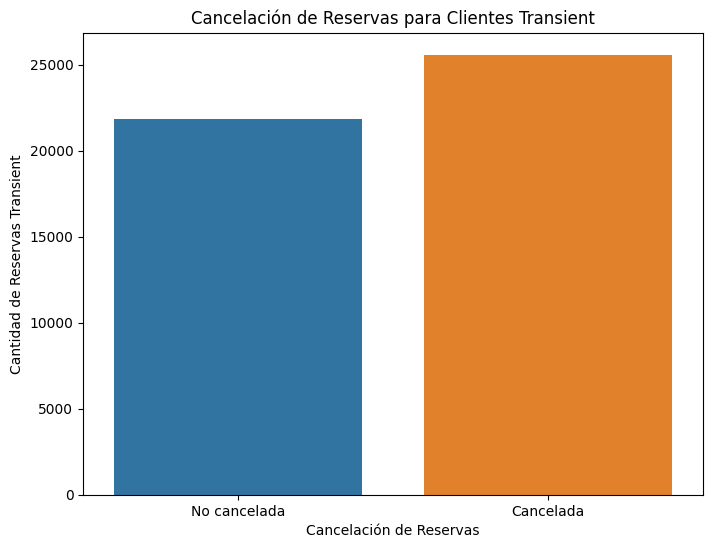

In [113]:
transient_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Transient']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient')
plt.title('Cancelación de Reservas para Clientes Transient')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Apaentemente los clientes Transient que cancelaron son mayores que los que no cancelaron.


Hacemos lo mismo con las reservas que tienen valor 'transient_party' en customer_type

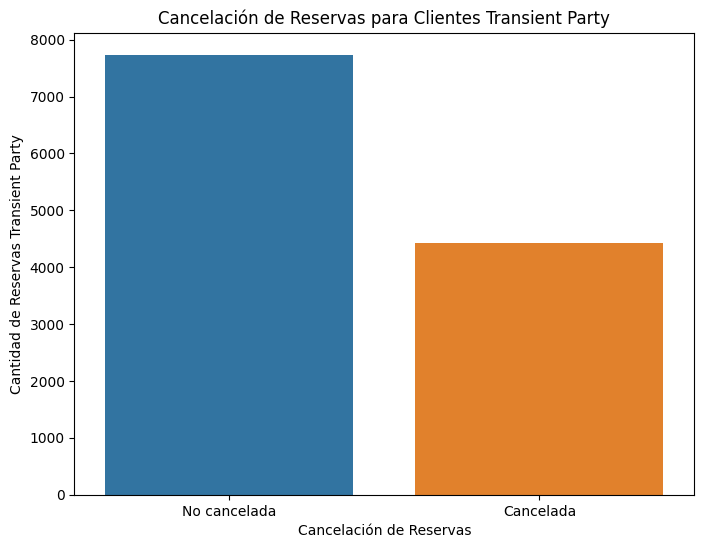

In [114]:
transient_party_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Transient-Party']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_party_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient Party')
plt.title('Cancelación de Reservas para Clientes Transient Party')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que las reservas con clientes Transient Party suelen cancelarse con menor frecuencia.


Repetimos para el valor 'contract'

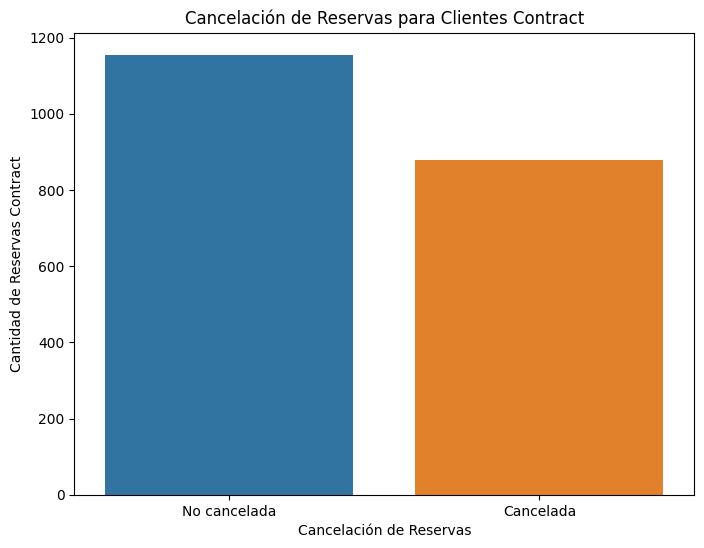

In [115]:
contract_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Contract']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=contract_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Contract')
plt.title('Cancelación de Reservas para Clientes Contract')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Por último, vemos la relación cuando esta variable toma el valor 'group'


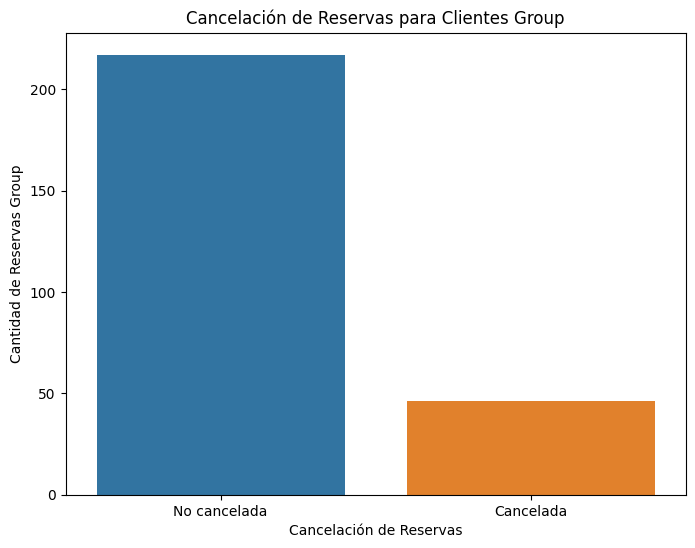

In [116]:
group_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Group']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=group_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Group')
plt.title('Cancelación de Reservas para Clientes Group')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que las reservas con clientes Group suelen cancelarse con menor frecuencia.

Juntamos los 4 graficos

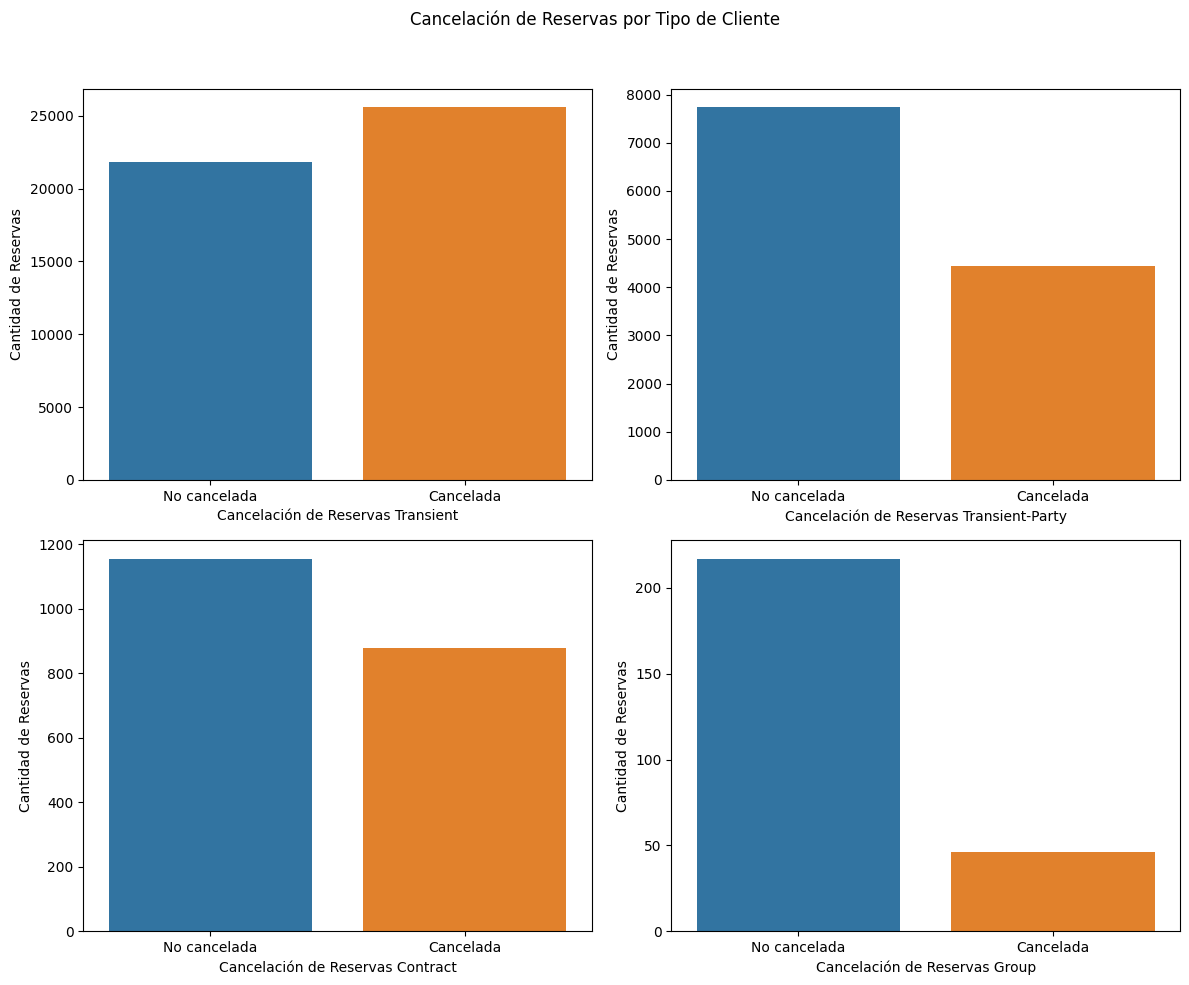

In [117]:
# Crear un conjunto de subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Cancelación de Reservas por Tipo de Cliente')

# Crear gráficos de barras para cada tipo de cliente en su respectivo subgráfico
sns.countplot(data=transient_df, x='is_canceled', ax=axes[0, 0])
axes[0, 0].set_xlabel('Cancelación de Reservas Transient')
axes[0, 0].set_ylabel('Cantidad de Reservas')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=transient_party_df, x='is_canceled', ax=axes[0, 1])
axes[0, 1].set_xlabel('Cancelación de Reservas Transient-Party')
axes[0, 1].set_ylabel('Cantidad de Reservas')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=contract_df, x='is_canceled', ax=axes[1, 0])
axes[1, 0].set_xlabel('Cancelación de Reservas Contract')
axes[1, 0].set_ylabel('Cantidad de Reservas')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=group_df, x='is_canceled', ax=axes[1, 1])
axes[1, 1].set_xlabel('Cancelación de Reservas Group')
axes[1, 1].set_ylabel('Cantidad de Reservas')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No cancelada', 'Cancelada'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Como conclusión final, vemos que las reservas con customer_type del tipo 'transient'(es el valor que en más reservas se repite) suelen cancelarse con mayor frecuencia; para las reservas con 'transient party', 'contract' y 'group' tenemos más reservas NO canceladas. Esta variable va a ser interesante para nosotros a la hora de hacer nuestros modelos de predicción.

# 15) Variable DaysInWaitingList
Es una variable cuantitativa que describe el número de días que la reserva estuvo en el
lista de espera antes de que fuera confirmado
el cliente.

## Limpieza de datos
Comenzamos por ver lo posibles valores que toma la variable y si hay algun valor nulo cargado en la columna o si hay mal cargados, valores negativos por ejemplo

In [118]:
columna_daysinwaitinglist = ds_hoteles_train['days_in_waiting_list']

columna_daysinwaitinglist.value_counts()

0      59678
39       155
31        90
44        83
58        82
       ...  
81         1
121        1
97         1
193        1
105        1
Name: days_in_waiting_list, Length: 116, dtype: int64

In [119]:
columna_daysinwaitinglist.isna().sum()

0

In [120]:
(columna_daysinwaitinglist >= 0).value_counts()

True    61913
Name: days_in_waiting_list, dtype: int64

Podemos observar que no hay valores mal cargados o valores nulos por lo que podemos concluir que la columna esta bien cargada

## Analisis y visualizacion de datos
Como conclusión inicial, vemos que la gran mayoría de reservas(59678 exactamente) tuvieron 0 días de espera antes de ser confirmadas. Esto nos ayuda para pensar lo siguiente: tendríamos que centrar nuestro análisis para aquellas reservas en los que tuvieron a partir de un día de espera, y ver qué ocurrió con ellas(si fueron canceladas o no).

Comenzamos analizando el grupo de las reservas con 0 días de espera antes de confirmarse las mismas.

In [121]:
ds_reservas_con_0_dias_de_espera = ds_hoteles_train[(ds_hoteles_train['days_in_waiting_list'] == 0) ]

ds_reservas_con_0_dias_de_espera['is_canceled'].value_counts()

0    30377
1    29301
Name: is_canceled, dtype: int64

Mostramos en un gráfico la relación entre las reservas con 0 días de espera y la variable target

([<matplotlib.axis.XTick at 0x7eb1bc81b460>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

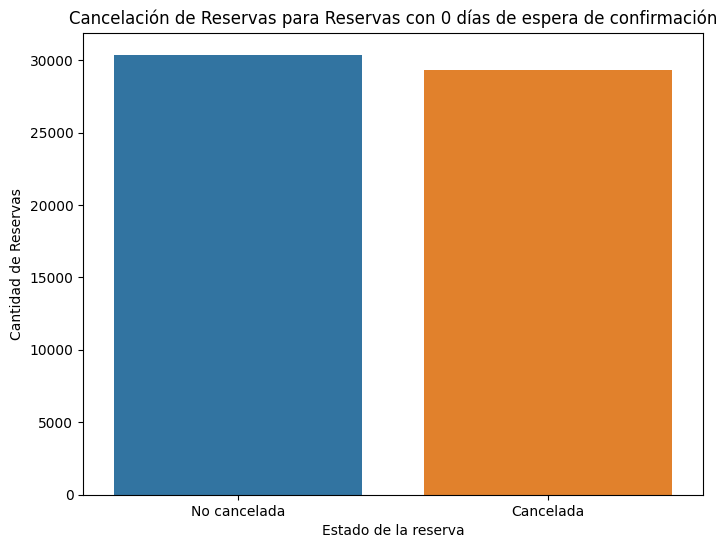

In [122]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_0_dias_de_espera, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con 0 días de espera de confirmación')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Observamos que para este valor, está pareja la cantidad de reservas que fueron canceladas con las que no(más reservas NO fueron canceladas).

Veamos ahora qué ocurre con las reservas que tuvieron a partir de un día de espera para su confirmación.


In [123]:
ds_days_in_waiting_list = ds_hoteles_train.loc[columna_daysinwaitinglist > 1]

ds_days_in_waiting_list.shape

(2229, 32)

Existen 2229 reservas que al menos tuvieron un dia dentro de la lista de espera, veamos sus medidas de resumen

In [124]:
ds_days_in_waiting_list['days_in_waiting_list'].describe()

count    2229.000000
mean       73.297891
std        66.722301
min         2.000000
25%        38.000000
50%        50.000000
75%        91.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64

Observemos estas medidas en un boxplot

Text(0.5, 1.0, 'Boxplot de las reservas con espera de confirmación mayor a un día')

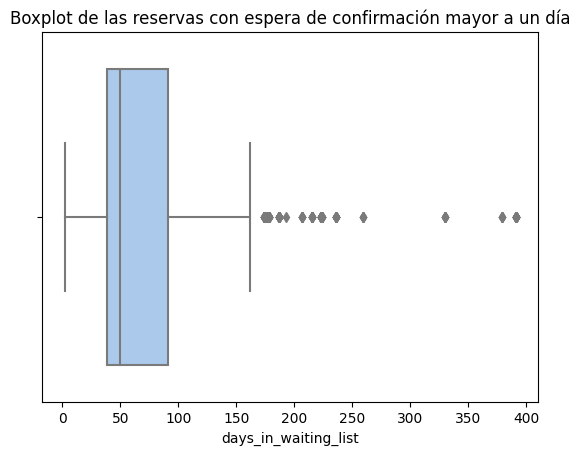

In [125]:
sns.boxplot(x = ds_days_in_waiting_list['days_in_waiting_list'], palette = "pastel")
plt.title('Boxplot de las reservas con espera de confirmación mayor a un día')

Observamos que estas reservas se mantienen en un rango de desde 40 a 90 días de espera aproximadamente, mientras que hubieron reservas con más de 150 días de espera, nos interesa saber qué pasó con esas reservas.

Comenzamos viendo con las reservas con esperas desde 1 a 90 días para su confirmación

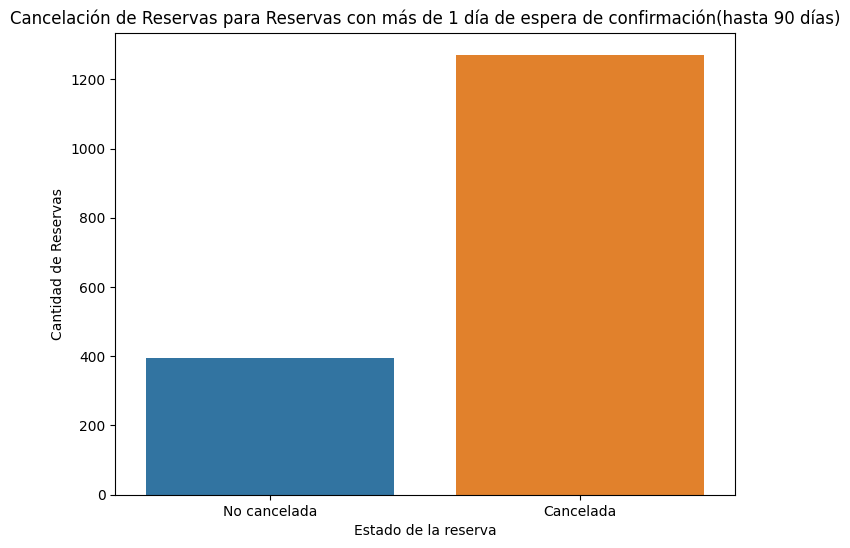

In [126]:
ds_days_in_waiting_list_media = ds_hoteles_train.loc[(columna_daysinwaitinglist >= 1) & (columna_daysinwaitinglist < 90)]
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list_media, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con más de 1 día de espera de confirmación(hasta 90 días)')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.show()

Observamos que la gran mayoría de reservas con más de 1 día(hasta 90 días) de espera para confirmar la reserva terminaron siendo canceladas. Entonces el tiempo de espera de confirmación parece ser un factor muy importante a la hora de ver el estado final de la reserva.

Veamos ahora con las reservas que tuvieron más de 90 días de espera para su confirmación

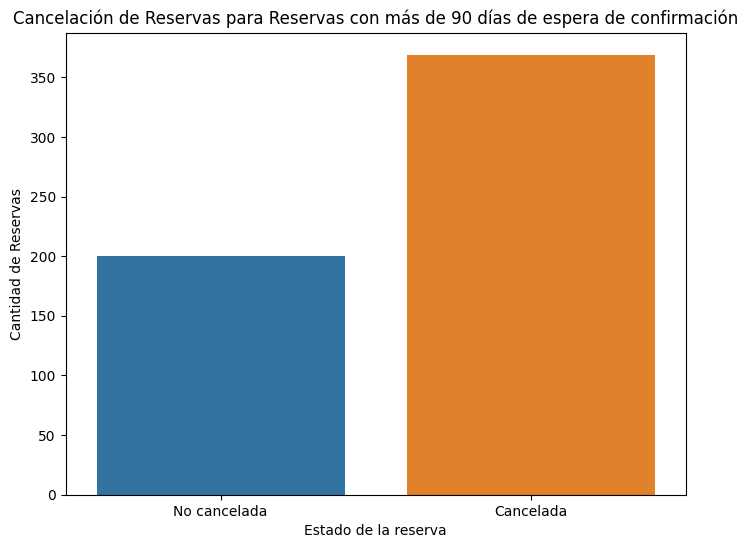

In [127]:
ds_days_in_waiting_list_media = ds_hoteles_train.loc[columna_daysinwaitinglist >= 90]
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list_media, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con más de 90 días de espera de confirmación')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.show()

Observamos(como era de esperarse), que casi el doble de las reservas que tuvieron más de 90 días de espera para su confirmación fueron canceladas.

Como conclusión para esta variable, decimos que es muy importante para el análisis, porque a mayor cantidad de días de espera para confirmarse, las reservas tienden más a terminar siendo canceladas.

# 16) Variable DepositType
Es una variable cualitativa que nos da una
Indicación sobre si el cliente realizó un
depósito al realizar la reserva, asi que veamos que valores puede tomar

## Limpieza de datos
Empezamos por ver la cantidad de valores posibles puede tomar la variable y si hay valores null cargados

In [128]:
columna_deposit = ds_hoteles_train['deposit_type']

columna_deposit.value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

In [129]:
columna_deposit.isna().sum()

0

## Analisis y Visualizacion de datos
Observamos que hay 3 valores: 'no deposit'(sin depósito bancario), 'non refund'(sin reembolso), y 'refundable'(con reembolso). Para nuestro análisis, esta variable tiene mucho valor, ya que por ejemplo, sin haber empezado a ver los valores, podemos tomar como hipótesis inicial por ejemplo que las reservas sin reembolso serán las que más tiendan a NO cancelarse

Veamoslo en un gráfico los valores que toma la variable

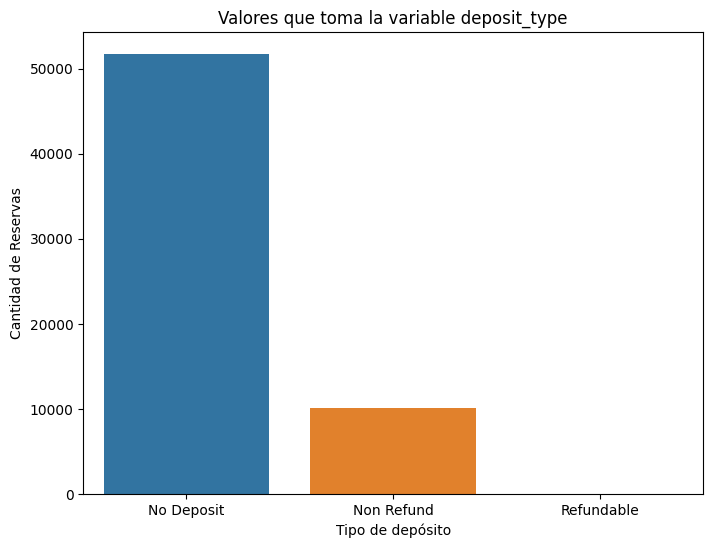

In [130]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train, x='deposit_type')
plt.xlabel('Tipo de depósito')
plt.ylabel('Cantidad de Reservas')
plt.title('Valores que toma la variable deposit_type')
plt.show()

Vemos que un gran número de reservas fueron sin depósito

Analicemos valor a valor con respecto a la variable is_canceled

In [131]:
ds_deposit_no_deposit = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'No Deposit']
ds_deposit_non_refund = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'Non Refund']
ds_deposit_refundable = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'Refundable']

Veamos en un gráfico la relación entre las reservas que no tuvieron depósito con la variable target

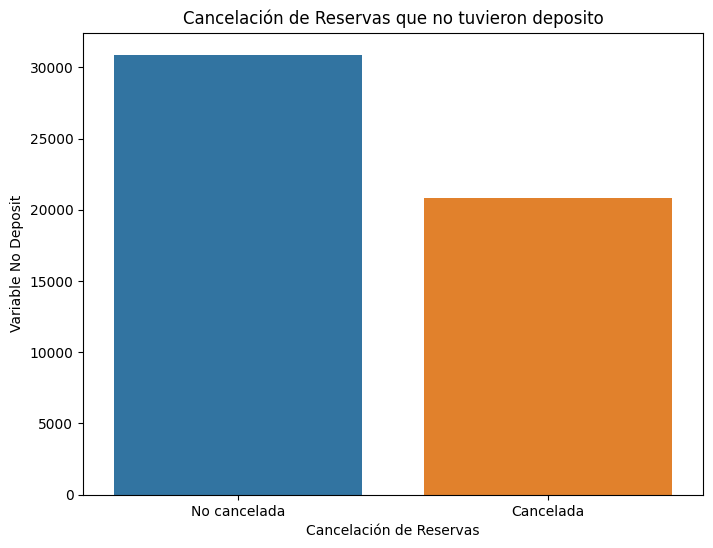

In [132]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_no_deposit, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable No Deposit')
plt.title('Cancelación de Reservas que no tuvieron deposito')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que, por casi 10000 reservas de diferencia, las reservas que tuvieron este valor en la variable 'deposit_type' no fueron canceladas.

Realizamos el mismo gráfico pero ahora con las reservas sin reembolso

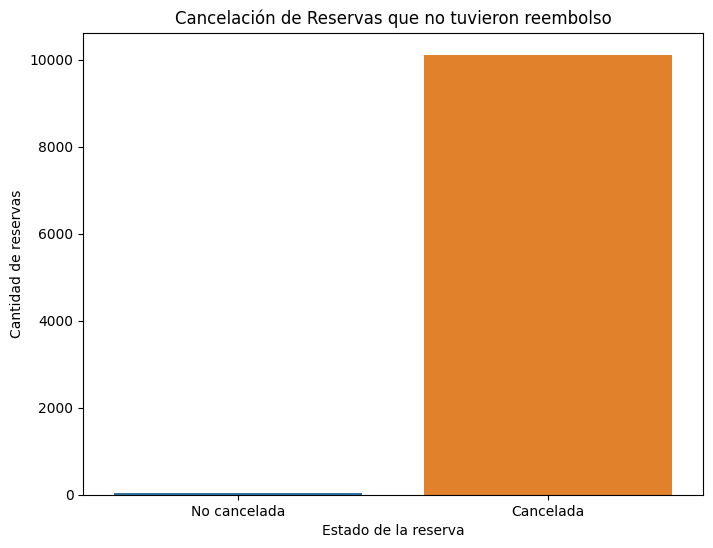

In [133]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_non_refund, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas que no tuvieron reembolso')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Ante todo pronóstico, la gran mayoría de reservas que NO tuvieron reembolso fueron finalmente canceladas. Esto es muy importante para tener en cuenta(no podemos confiar de nuestras suposiciones :D)

Por último, analizamos esta relación con la variable target cuando deposit_type es 'refundable'

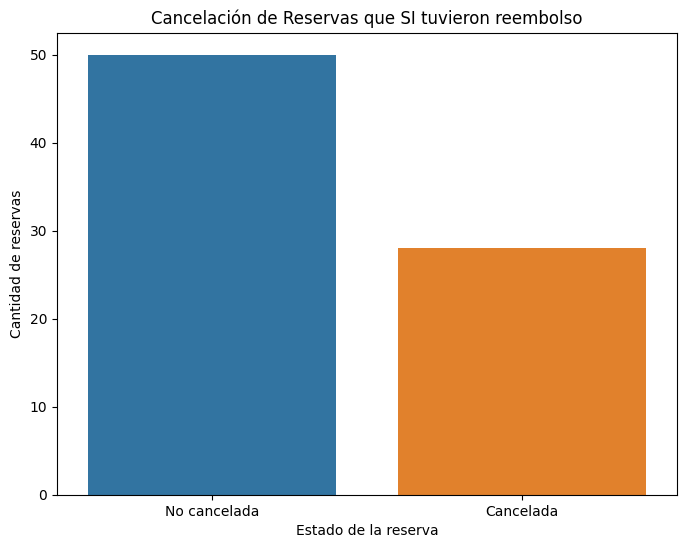

In [134]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_refundable, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas que SI tuvieron reembolso')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que, por casi el doble de casos, las reservas que fueron reembolsables NO fueron canceladas.

# 17) Variable DistributionChannel
Esta variable cualitativa que muestra el canal de distribución de reservas. El término
“TA” significa “Agentes de Viajes” y “TO”
significa “operadores turísticos”.
Veamos los valores que puede tomar

## Limpieza de datos
Empecemos por ver la cantidad de posibles valores que puede tomar la columna y si tiene valores nulos cargados

In [135]:
columna_distribution_channel = ds_hoteles_train['distribution_channel']

columna_distribution_channel.value_counts()

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

Veamos si tiene un valor nulo


In [136]:
columna_distribution_channel.isna().sum()

0

No tiene datos faltantes, sin embargo vemos que esta variable toma en 4 casos el valor 'Undefined', pero veamos esto en un gráfico de torta

## Analisis y Visualizacion de datos

Text(0.5, 1.0, 'Distribution Channel')

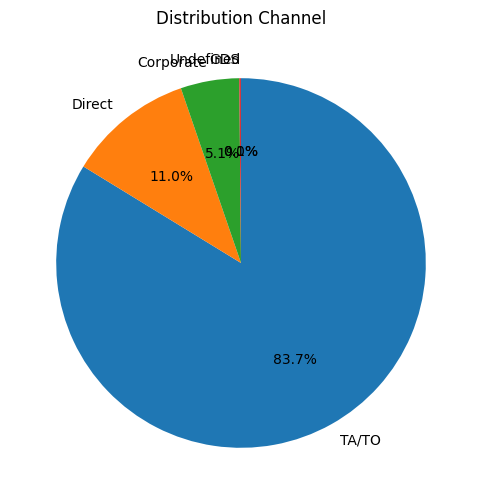

In [137]:
plt.figure(figsize=(6, 6))

plt.pie(columna_distribution_channel.value_counts(),labels=columna_distribution_channel.value_counts().index,
       autopct='%1.1f%%', startangle=90, counterclock=False )
plt.title('Distribution Channel')
#plt.axis('equal')  # Hace que el gráfico de torta sea circular

Vamos a considerar la variable TA/TO como la variable a analizar,veamos como se distribuyen con la variable is_canceled

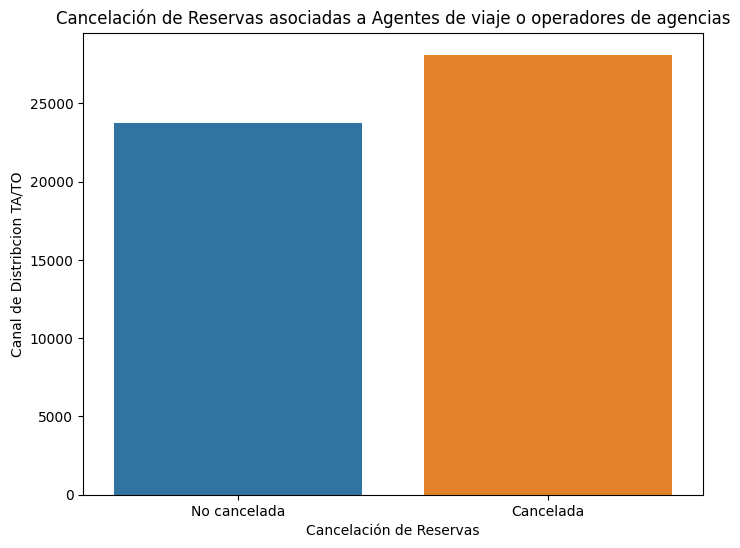

In [138]:
ds_distribution_ta_to = ds_hoteles_train[ds_hoteles_train['distribution_channel'] == 'TA/TO']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_distribution_ta_to, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Canal de Distribcion TA/TO')
plt.title('Cancelación de Reservas asociadas a Agentes de viaje o operadores de agencias')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()




# 18) Variable is_repeated_guest
Es el valor que indica si el nombre de la reserva
fue de un invitado repetido (1) o no (0).Es una variable cualitativa, por lo cual procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son

## Limpieza de datos
Veremos tambien si hay valores nulos cargados

In [139]:
ds_hoteles_train['is_repeated_guest'].value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

In [140]:
ds_hoteles_train['is_repeated_guest'].isna().sum()

0

## Analisis y visualizacion de datos
Podemos visualizar que existen mayor cantidad de personas que no habían visitado antes el hotel que de personas que si habían visitado.
Usamos un gráfico de torta para poder visualizarlo mas detallado.

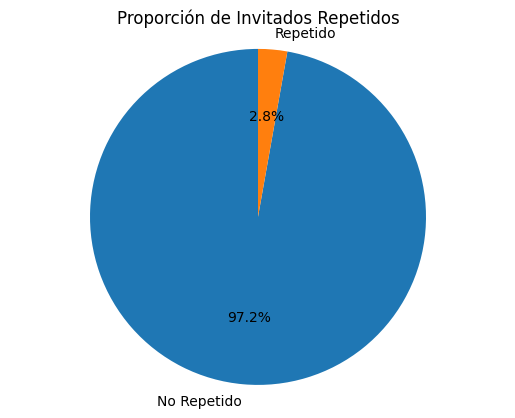

In [141]:
repetido_counts = ds_hoteles_train['is_repeated_guest'].value_counts()
labels = ['No Repetido', 'Repetido']
plt.pie(repetido_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Invitados Repetidos')
plt.show()

Vemos si la variable tiene datos faltantes

In [142]:
ds_hoteles_train['is_repeated_guest'].isna().sum()

0

No tenemos datos faltantes, por lo que procedemos con el análisis

 Analizamos, junto a las otras variables,a buscar correlacion entre ellas;y la primer variable que puede tener una conexion con la misma es la variable hotel.
La usare para calcular la proporción de invitados repetidos en cada tipo de hotel. Esto te ayudará a comprender si la proporción de invitados repetidos varía según el tipo de hotel.

In [143]:
proporcion_por_tipo_de_hotel = ds_hoteles_train.groupby('hotel')['is_repeated_guest'].mean()* 100
print(proporcion_por_tipo_de_hotel)

hotel
City Hotel      2.307199
Resort Hotel    3.846543
Name: is_repeated_guest, dtype: float64


Estos resultados nos muestran que:


*  En el "City Hotel," aproximadamente el 2.31% de los invitados son repetidos
* En el "Resort Hotel," aproximadamente el 3.85% de los invitados son repetidos.  


Estos resultados sugieren que el "Resort Hotel" tiene una proporción más alta de invitados repetidos en comparación con el "City Hotel.
Lo veremos en un grafico

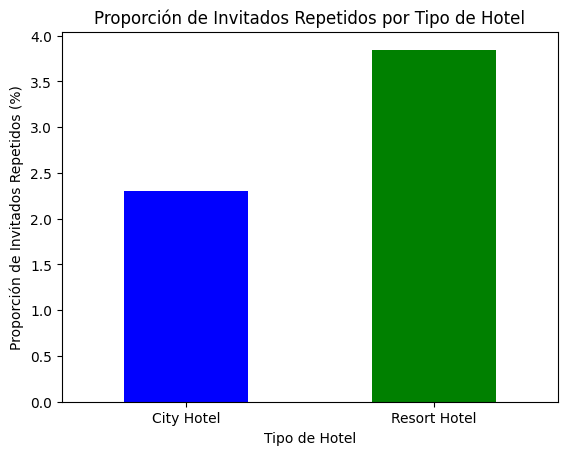

In [144]:
proporcion_por_tipo_de_hotel.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Proporción de Invitados Repetidos (%)')  # Agregar (%) al título del eje y
plt.title('Proporción de Invitados Repetidos por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Voy a ver como esta relacionada la variable con las cancelaciones

In [145]:
repetidos_df = ds_hoteles_train[ds_hoteles_train['is_repeated_guest'] == 1]
no_repetidos_df = ds_hoteles_train[ds_hoteles_train['is_repeated_guest'] == 0]

En estos nuevos dataframes, tengo separado los clientes repetidos y los no repetidos, y a continuacion voy a ver en un gráfico si la cancelaciones tienen una conexión con las cancelaciones

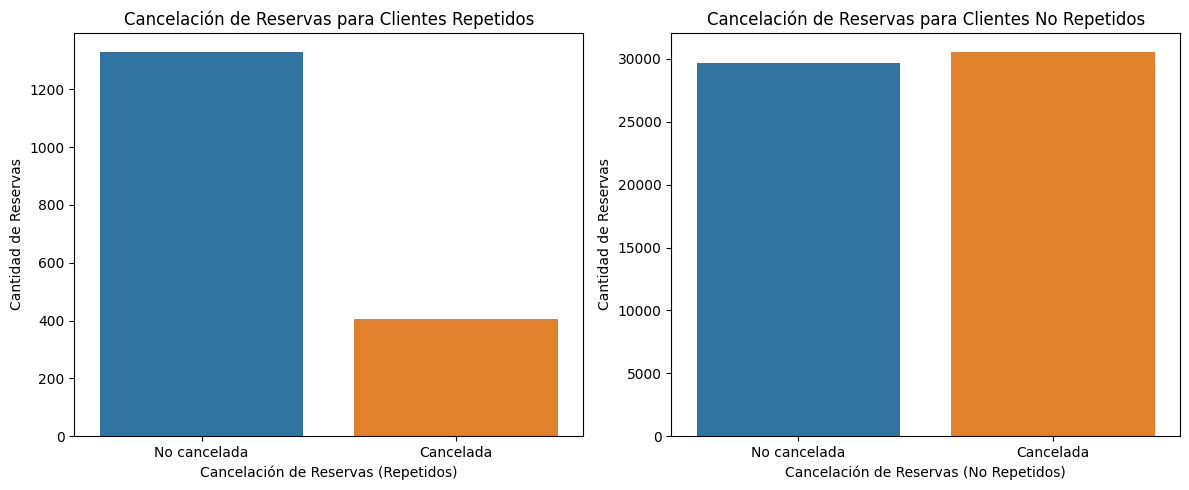

In [146]:
# Crear dos gráficos de barras separados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.subplot(1, 2, 2)
sns.countplot(data=no_repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (No Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes No Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.tight_layout()
plt.show()

A simple vista con los clientes no repetidos no existe mucha relacion entre las cancelaciones,mientras que los clientes repetidos tienden a no cancelar las reservas por encima de las canceladas.
Una hipótesis con esta variable es que los clientes que ya han estado previamente,tienden a no cancelar a proximas reservas.



---

# 19) Variable hotel

Esta columna representa al tipo de hotel en el cual se realizó la reserva. El tipo de dato de esta columna es de tipo object, por lo que sospechamos que es una variable del tipo cualitativa, entonces procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son.

## Limpieza de datos
Vemos qué valores toma esta variable y con qué frecuencia lo hacen y si hay valores nulos cargados

In [147]:
columna_hotel = ds_hoteles_train['hotel']
columna_hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

In [148]:
columna_hotel.isna().sum()

0

## Analisis de datos y visualizacion
Usamos un gráfico de barras para ver la distribución

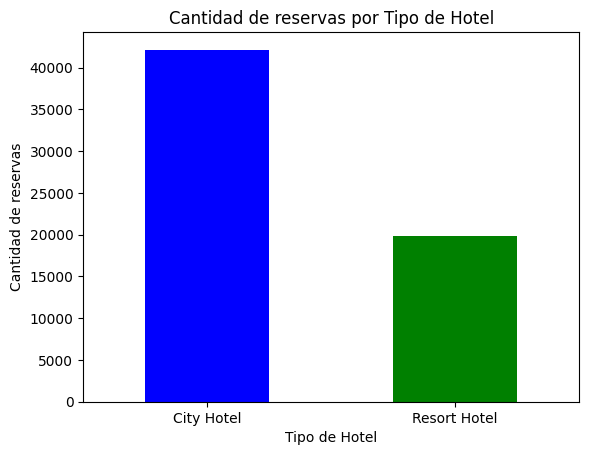

In [149]:
columna_hotel.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Observamos que la gran mayoria de reservas(exactamente 42129 reservas) se dieron en los llamados 'city hotel', mientras que el resto de reservas(19784) fueron en hoteles del tipo 'resort hotel'

Ahora nos interesa saber cuántas reservas se cancelaron efectivamente dependiendo del tipo de hotel que se eligió

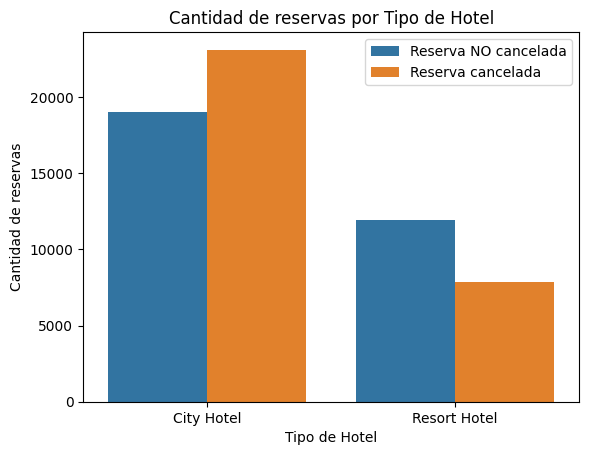

In [150]:
sns.countplot(data=ds_hoteles_train, x="hotel", hue="is_canceled")
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.legend(labels=["Reserva NO cancelada","Reserva cancelada"])

Observamos que las reservas con hoteles del tipo 'City Hotel' tienen alrededor de 23000 reservas canceladas(mas reservas canceladas que las que NO se cancelaron). En cambio, las reservas en hoteles del tipo 'Resort Hotel' conservan alrededor de 12000 reservas que NO se cancelaron, mientras que casi 8000 reservas si se cancelaron.

Con esto, tomamos como conclusion de que las reservas que tienen un tipo de hotel 'City Hotel' tienden a ser más canceladas que las que tienen 'Resort Hotel'.



---

# 20) Variable lead time


Esta variable representa la cantidad de días que entre que se hizo la reserva y la fecha de entrada al hotel. Se calcula a partir de la resta del día la fecha de entrada al hotel.
Es una variable cuantitativa (int), por lo que procedemos a ver la mayor cantidad de metricas posibles (media, mediana, moda, etc)

## Limpieza de datos
Empezamos por asegurarnos que los valores de la columna esten un rango valido y que no haya valores null cargados

In [151]:
columna_lead_time = ds_hoteles_train['lead_time']
columna_lead_time.isna().sum()

0

In [152]:
(columna_lead_time >= 0).value_counts()

True    61913
Name: lead_time, dtype: int64

## Analisis de datos y visualizacion
Como es una variable cuantitativa (int), por lo que procedemos a ver la mayor cantidad de metricas posibles (media, mediana, moda, etc)

In [153]:
columna_lead_time.describe()

count    61913.000000
mean       112.248187
std        110.717953
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

Visualizamos los datos en un boxplot para poder observar una mejor distribución de los datos

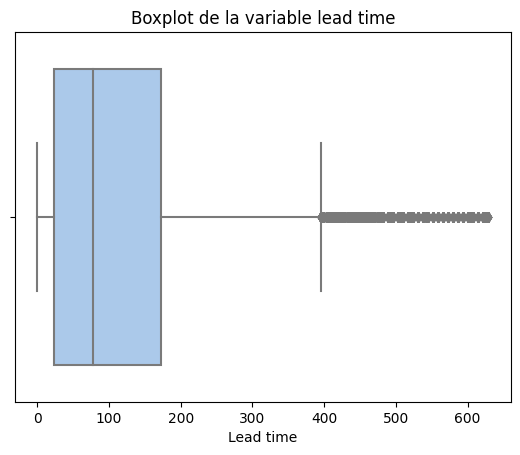

In [154]:
sns.boxplot(x = columna_lead_time, palette = "pastel")
plt.title("Boxplot de la variable lead time")
plt.xlabel('Lead time')
plt.show()

Observamos que una mayoría de reservas tuvieron un lead_time con valor entre 50 y 150. Es decir, la mayoría de reservas se dieron entre 50 días y 150 días de anticipación.

Buscamos una relación entre el tipo de hotel de estas reservas y la variable lead_time.

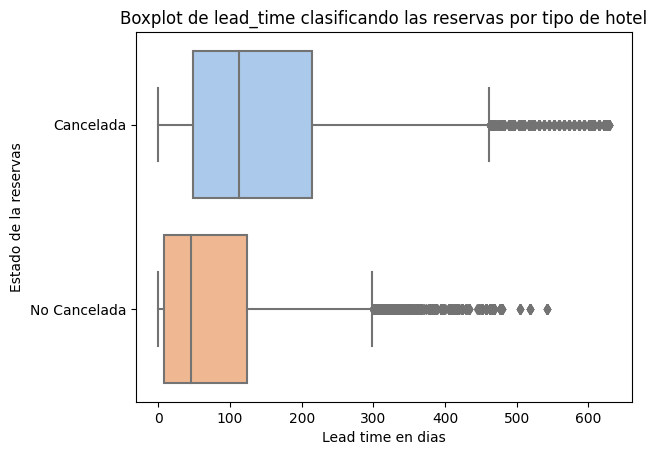

In [155]:
sns.boxplot(x = columna_lead_time, y = ds_hoteles_train["is_canceled_cat"], palette = "pastel")
plt.title("Boxplot de lead_time clasificando las reservas por tipo de hotel")
plt.xlabel('Lead time en dias')
plt.ylabel('Estado de la reservas')
plt.show()

A partir de este gráfico y las estadísticas podemos observar que la mayoría de las reservas entre se hacen entre los 0 dias y 200 dias, con varios outliers con reservas de más de 400 dias. Observamos más detalladamente, la distribución de los datos sin los outliers y de solo los outliers

In [156]:
ds_lead_time_menor_400 = ds_hoteles_train.loc[columna_lead_time <= 400]
ds_lead_time_menor_400.shape

(60622, 32)

Podemos observar que hemos filtrado solamente alrededor de 1300 columnas. Ahora observemos la distribucion de los datos para estos datos

In [157]:
ds_lead_time_menor_400["lead_time"].describe()

count    60622.000000
mean       104.605853
std         98.161467
min          0.000000
25%         22.000000
50%         74.000000
75%        165.000000
max        400.000000
Name: lead_time, dtype: float64

In [158]:
ds_lead_time_mas_400 = ds_hoteles_train.loc[columna_lead_time > 400]
ds_lead_time_mas_400["lead_time"].describe()

count    1291.000000
mean      471.112316
std        62.393007
min       403.000000
25%       422.000000
50%       454.000000
75%       496.000000
max       629.000000
Name: lead_time, dtype: float64

De nuevo, nos apoyamos en un boxplot para observar estas medidas

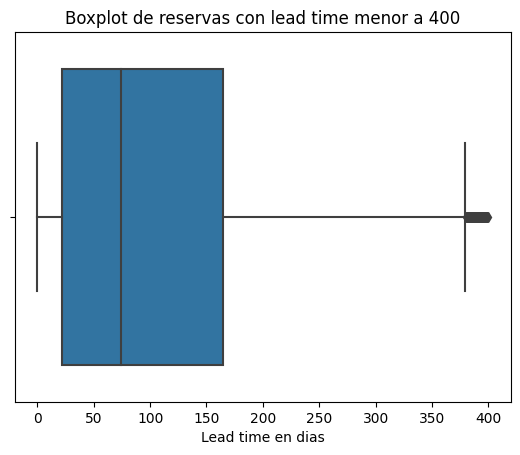

In [159]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"])
plt.title("Boxplot de reservas con lead time menor a 400")
plt.xlabel('Lead time en dias')
plt.show()

Observamos que estas reservas tuvieron un lead_time con valor entre 30 y 170 aproximadamente.

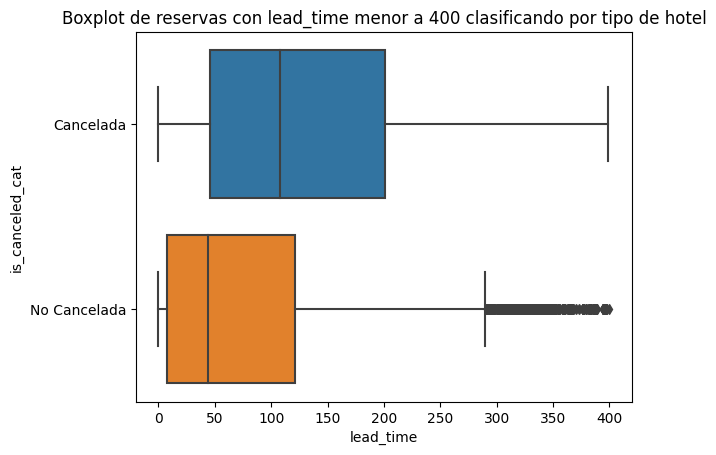

In [160]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"], y = ds_lead_time_menor_400["is_canceled_cat"])
plt.title("Boxplot de reservas con lead_time menor a 400 clasificando por tipo de hotel")
plt.show()

<Axes: xlabel='lead_time', ylabel='Count'>

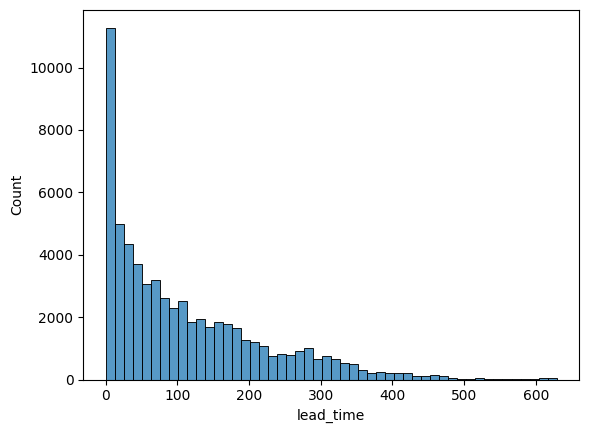

In [161]:
sns.histplot(data = ds_hoteles_train, x = "lead_time", bins = 50)



---

# 21) Variable Market Segment
En un primer analisis, parece ser una variable del tipo categorica. Hace refencia al segmento del mercado al cual esta destinada la reserva. Las siglas TA y TO, hacen referencia Travel Agents y Travel Operators. Por lo que podemos empezamos a explorar cuales son sus posibles valores y como se pueden llegar a relacionar con las reservas canceladas

## Limpieza de datos ( 2 valores undefined)
Empezamos por ver que posibles valores puede tomar la variable y si posee campos nulos

In [162]:
market_segmets_counts = ds_hoteles_train["market_segment"].value_counts().reset_index()
market_segmets_counts

,index,market_segment
0,Online TA,29269
1,Offline TA/TO,12384
2,Groups,11545
3,Direct,5757
4,Corporate,2484
5,Complementary,359
6,Aviation,113
7,Undefined,2


In [163]:
ds_hoteles_train["market_segment"].isna().sum()

0

Observamos que hay dos filas que estan categorizadas como Undefined, tendremos que evaluar si tenemos que sacarlas del dataset, ignorarlas o reemplazarlas por un valor valido

## Analisis de datos y visualizacion
La mayoria de las reservas vemos que fueron reservadas mediante Online Travel Agents, seguido por offline Travel Agents y operators, seguido por grupos y reservas directas. Para poder

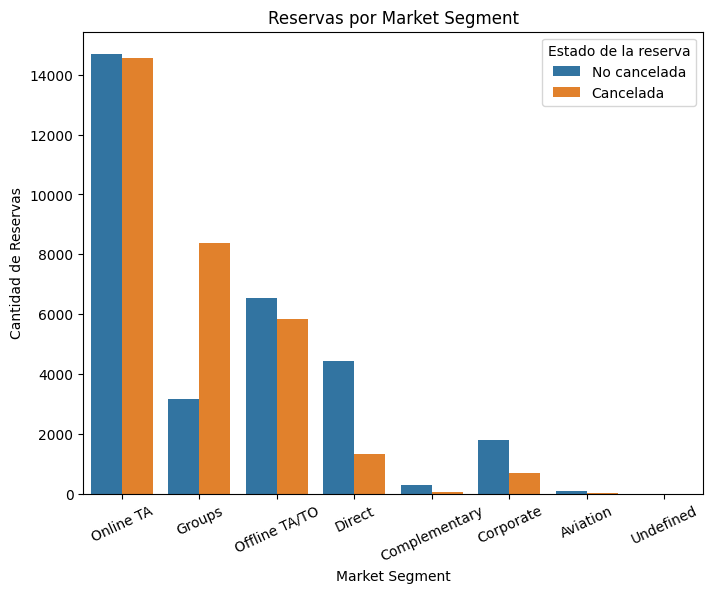

In [164]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train, x='market_segment' , hue= 'is_canceled')
plt.xlabel('Market Segment')
plt.xticks(rotation=25)
plt.ylabel('Cantidad de Reservas')
plt.title('Reservas por Market Segment')
plt.legend(title='Estado de la reserva', labels=['No cancelada', 'Cancelada'])
plt.show()

A partir de este grafico podemos, concluir que la mitad de las reservas de hechas por Online TA son canceladas, sin embargo algo mas claro a destacar es que la mayoria de las reservas hechas por Grupos son canceladas y l mayoria de las reservas hechas directamente o por corporaciones no son canceladas.

# 22) Variable Meal
En un primer análisis, es una variable del tipo cualitativa. Hace refencia al tipo de comida reservada. Por lo que podemos empezamos a explorar cuales son sus posibles valores y como se pueden llegar a relacionar con las reservas canceladas.
Mi hipótesis antes de comenzar con el análisis,es que el tipo de comida no tiene impacto en la tasa de cancelación,pero veremos en el análisis si es correcta.


## Limpieza de datos
Vemos los posibles valores que toma la variable y con qué frecuencia lo hace, que tambine esta relacionada a su analisis. Tambien veremos si hay valores nulos cargados en la columna

In [165]:
columna_meal = ds_hoteles_train['meal']

columna_meal.value_counts()

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

In [166]:
columna_meal.isna().sum()

0

A primera vista, a pesar de parecer que los valores dentro con la categoria undefined son validos, es en realidad que la reserva no incluye ninguna comida. Por lo que podemos concluir que los datos estan bien cargados

## Analisis y visualizacion de datos
Luego de ver los posibles valores que toman, debo asociar la variable Undefined y SC, ya que el paper dado lo dice, por lo cual quedaría así

In [167]:
df_copia_meal = ds_hoteles_train.copy()

# Reemplazar "SC" y "Undefined" por "SC_Undefined" en la columna "meal" de la copia
df_copia_meal['meal'] = df_copia_meal['meal'].replace(['SC', 'Undefined'], 'SC_Undefined')

# Verificar el resultado en la copia
columna_meal_copia = df_copia_meal['meal']
columna_meal_copia.value_counts()


BB              47837
HB               7452
SC_Undefined     6147
FB                477
Name: meal, dtype: int64

Veamos como se distribuyen en un gráfico

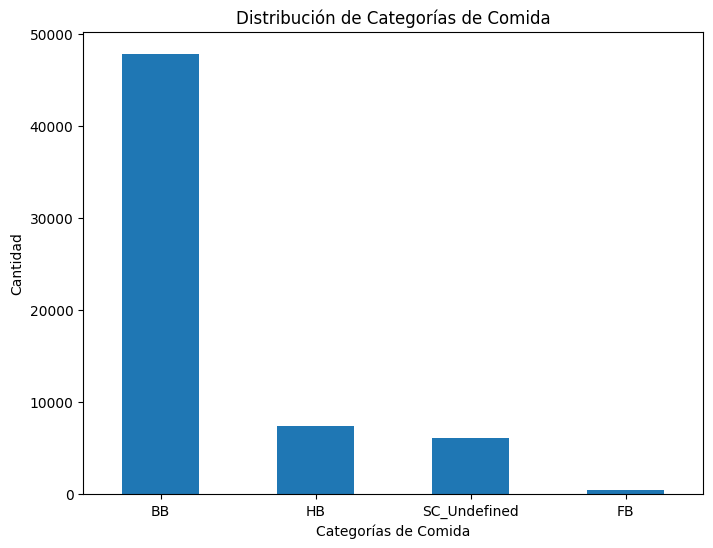

In [168]:
conteo_meal = df_copia_meal['meal'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_meal.plot(kind='bar')
plt.xlabel('Categorías de Comida')
plt.ylabel('Cantidad')
plt.title('Distribución de Categorías de Comida')
plt.xticks(rotation=0)  # Para evitar la rotación de etiquetas en el eje x
plt.show()

Vamos a analizar valor por valor,y analizar si existe alguna hipótesis asociada a ella

In [169]:
ds_meal_bb = df_copia_meal[df_copia_meal['meal'] == 'BB']
ds_meal_hb = df_copia_meal[df_copia_meal['meal'] == 'HB']
ds_meal_sc_undefined = df_copia_meal[df_copia_meal['meal'] == 'SC_Undefined']
ds_meal_fb = df_copia_meal[df_copia_meal['meal'] == 'FB']

Comenzemos con el valor BB

In [170]:
ds_meal_bb['is_canceled'].value_counts()

1    24144
0    23693
Name: is_canceled, dtype: int64

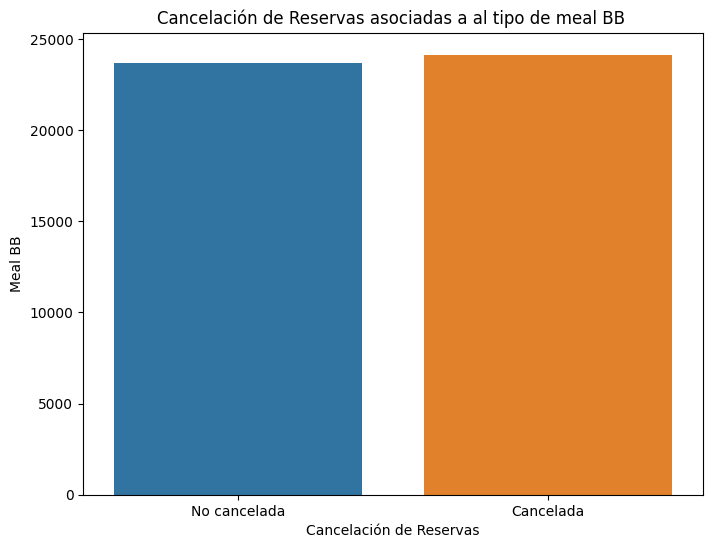

In [171]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_bb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal BB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal BB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A simple vista , con el tipo 'BB' podemos decir que no pareciera tener impacto en las tasas de cancelacion,ya que se dan con numeros similares entre las canceladas y las no canceladas

In [172]:
ds_meal_hb['is_canceled'].value_counts()

0    3966
1    3486
Name: is_canceled, dtype: int64

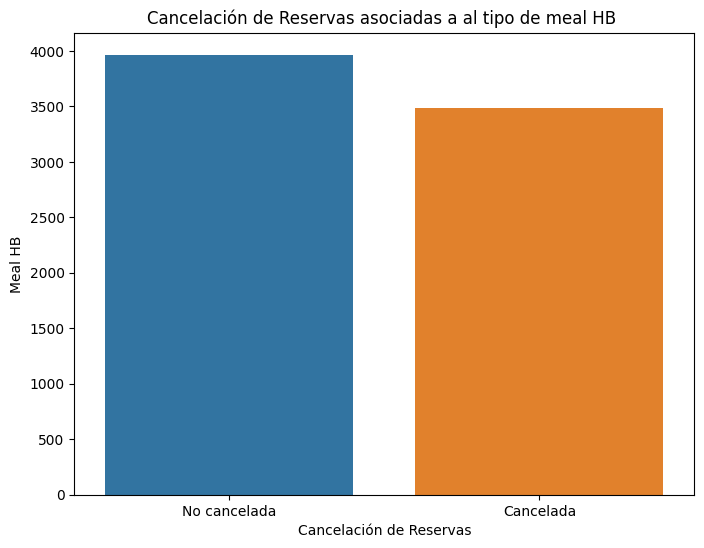

In [173]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_hb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal HB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal HB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Al igual que el valor BB,esta variable tampoco tiene gran impacto en las cancelaciones

In [174]:
ds_meal_sc_undefined['is_canceled'].value_counts()

0    3169
1    2978
Name: is_canceled, dtype: int64

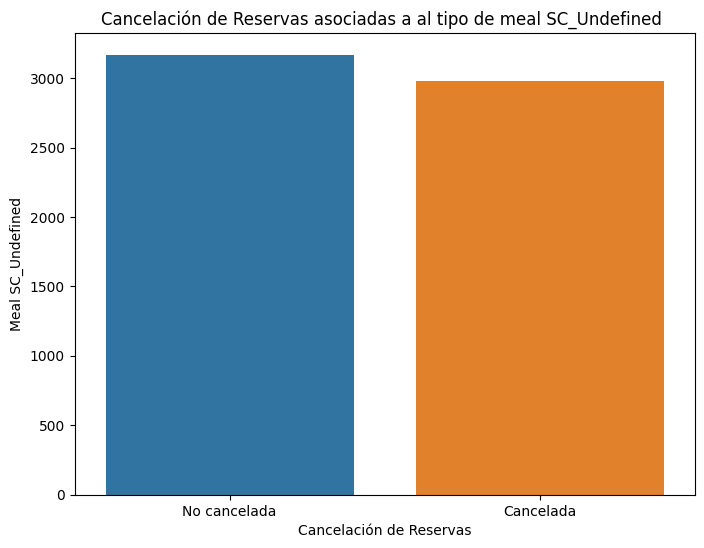

In [175]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_sc_undefined, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal SC_Undefined')
plt.title('Cancelación de Reservas asociadas a al tipo de meal SC_Undefined ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A diferencia de las otros valores, las cancelaciones son mayores que en las no canceladas,pero por muy pocos casos, veamos la ultima

In [176]:
ds_meal_fb['is_canceled'].value_counts()

1    333
0    144
Name: is_canceled, dtype: int64

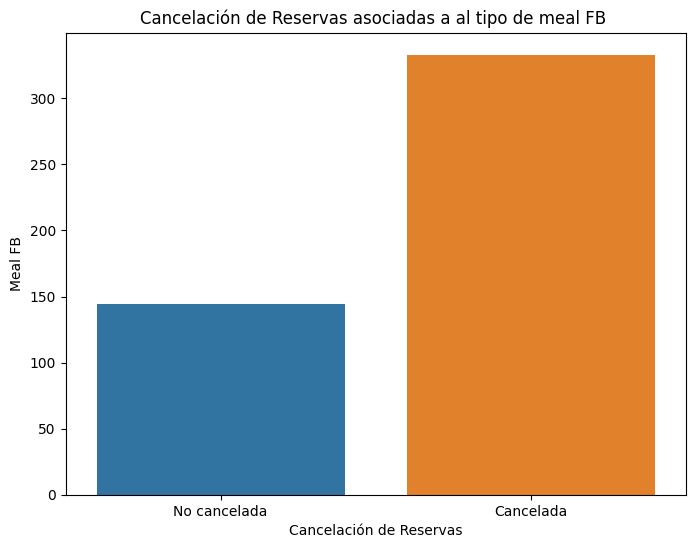

In [177]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_fb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal FB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal FB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar que las reservas con Meal FB tienden a tener una mayor proporcion de cancelacion que las que usan otro tipo de comida, por lo cual mi hipotesis no es correcta, los datos nos arrojan una tendencia mayor que en los ootros tipo de cancelacion.
Podemos analizar sus tasas promedio de cancelacion

In [178]:
promedio_por_meal = df_copia_meal.groupby('meal')['is_canceled'].mean()
promedio_por_meal

meal
BB              0.504714
FB              0.698113
HB              0.467794
SC_Undefined    0.484464
Name: is_canceled, dtype: float64

Dado estos resultados y que mi hipotesis anterior quedo refutada,planteo una nueva que las tasas de cancelacion de la variable FB pueden estar asociadas al tipo de hotel donde se ha hecho la reserva,y veremos si esta relacionada con sus cancelaciones

In [179]:
df_hotel_ch = ds_hoteles_train[ds_hoteles_train['hotel'] == 'City Hotel']
df_hotel_rh = ds_hoteles_train[ds_hoteles_train['hotel'] == 'Resort Hotel']

Veamos sus tasas de cancelacion

In [180]:
tasa_cancelacion_hotel_ch = df_hotel_ch.groupby('meal')['is_canceled'].mean()
tasa_cancelacion_hotel_rh = df_hotel_rh.groupby('meal')['is_canceled'].mean()
tasa_cancelacion_fb_ch = tasa_cancelacion_hotel_ch['FB']
tasa_cancelacion_fb_rh = tasa_cancelacion_hotel_rh['FB']

print('La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: ' + str(tasa_cancelacion_fb_ch )+' y la de Resort Hotel: ' +str( tasa_cancelacion_fb_rh))

La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: 0.9629629629629629 y la de Resort Hotel: 0.6822222222222222


Por lo cual ,estos valores indican que la categoría "FB" tiene tasas de cancelación relativamente altas tanto en el City Hotel como en el Resort Hotel. La tasa de cancelación en el Resort Hotel es un poco más alta que en el City Hotel para esta categoría específica.

La tasa de cancelación en la categoría "FB" es alta en ambos tipos de hoteles, lo que sugiere que esta categoría podría ser más propensa a cancelaciones independientemente del tipo de hotel.Veremos mas adelante si tiene algun significado estos datos obtenidos

# 23) Variable PreviousBookingsNotCanceled
Es una variable de tipo cuantitativa , que representa el número de reservas anteriores no
cancelado por el cliente antes de la
reserva actual,por lo cual veamos como se disrtibuye(media,mediana,...)

## Limpieza de datos
Veamos si tiene datos faltantes y si los valores tienen sentido, por ejemplo que no haya reservas previas negativas

In [181]:
columna_PreviousBookingsNotCanceled = ds_hoteles_train['previous_bookings_not_canceled']

columna_PreviousBookingsNotCanceled.isna().sum()

0

In [182]:
(columna_PreviousBookingsNotCanceled >= 0).value_counts()

True    61913
Name: previous_bookings_not_canceled, dtype: int64

## Analisis de datos y visualizaciones ( le faltan graficas, capaz algun boxplot)
Ya que no tiene datos faltantes ,seguiremos en análisis.

In [183]:
columna_PreviousBookingsNotCanceled = ds_hoteles_train['previous_bookings_not_canceled']

columna_PreviousBookingsNotCanceled.describe()

count    61913.000000
mean         0.115420
std          1.396359
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

# 24) Variable TotalOfSpecialRequests
Esta es una variable cuantitiva indica el total de solicitudes especiales de la reserva,veamos como se comporta la variable

## Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [184]:
columna_total_special_request = ds_hoteles_train['total_of_special_requests']

columna_total_special_request.isna().sum()

0

In [185]:
(columna_total_special_request >= 0).value_counts()

True    61913
Name: total_of_special_requests, dtype: int64

Podemos observar que no hay datos mal cargados y que no hay valores nulos, por lo cual podemos decir que la columna esta bien cargada para el dataset

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [186]:
columna_total_special_request.describe()

count    61913.000000
mean         0.523703
std          0.775412
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

Veamos si tiene algun valor faltane que pueda afectar a nuestro futuro analisis

Al no tener valores faltantes sabemos que su promedio es de 0.521068

In [187]:
columna_total_special_request.value_counts()

0    38622
1    15706
2     6227
3     1188
4      150
5       20
Name: total_of_special_requests, dtype: int64

Dado estos datos , vamos a ver como se distribuyen con la variable is_canceled

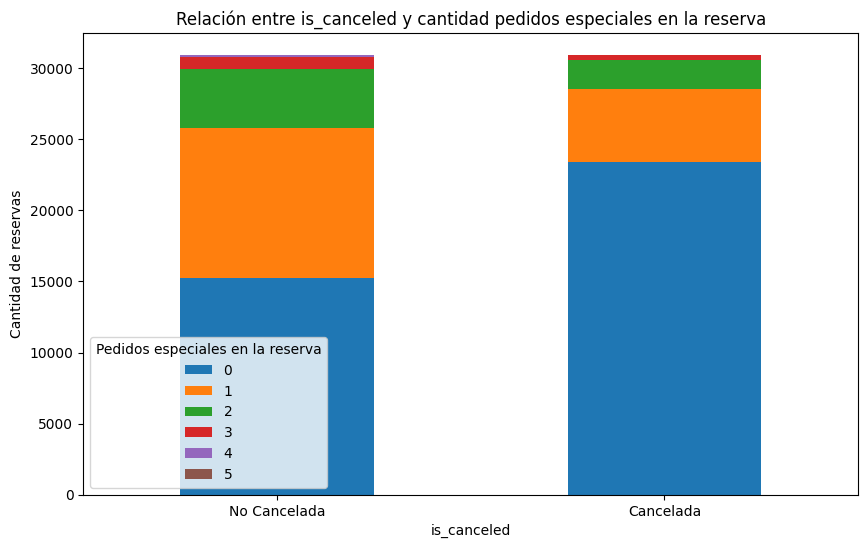

In [188]:

pivot_special_request = ds_hoteles_train.groupby(['is_canceled', 'total_of_special_requests']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = pivot_special_request.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('is_canceled')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'], rotation=0)
plt.title('Relación entre is_canceled y cantidad pedidos especiales en la reserva')
plt.legend(title='Pedidos especiales en la reserva')
plt.show()

# 25) Variable RequiredCardParkingSpaces
En un primer analisis, es una variable del tipo caunitativa . Hace refencia al número de plazas de aparcamiento necesarias por el cliente.
Veamos como se distribuyen los valores


## Limpieza de datos
Al ser una variable cuantitiva, comenzamos por ver si hay valores nulos cargados en el dataset y si hay valores que no tienen sentido para este analisis como valores negativos

In [189]:
columna_parking_spaces = ds_hoteles_train['required_car_parking_spaces']
columna_parking_spaces.isna().sum()

0

In [190]:
(columna_parking_spaces >= 0).value_counts()

True    61913
Name: required_car_parking_spaces, dtype: int64

Podemos observar que no hay valores faltantes y tambien que no hay valores fuera del rango valido por lo que podemos concluir que la columna esta bien cargada

## Analisis de datos y visualizaciones

In [191]:
columna_parking_spaces.value_counts()

0    58841
1     3058
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

Creare una copia de mi dataset donde dira se dividira si nesecita o no lugar para parking,dado las pocas alternativas que existen asi puedo asociar tambien a un unico valor dado su poco volumen

In [192]:
df_copia_parking = ds_hoteles_train.copy()

# Reemplazar 0 con 'No Requiere' y 1 o 2 con 'Requiere'
df_copia_parking['required_car_parking_spaces'] = df_copia_meal['required_car_parking_spaces'].replace({0: 'No Requiere', 1: 'Requiere', 2: 'Requiere'})


columna_parking_spaces_nueva = df_copia_parking['required_car_parking_spaces']

columna_parking_spaces_nueva.value_counts()

No Requiere    58841
Requiere        3070
8                  1
3                  1
Name: required_car_parking_spaces, dtype: int64

Veamos como se comporta con las cancelaciones,sobre todo las que requieren nos importan para ver su comportamiento

In [193]:
ds_parking_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'Requiere']
ds_parking_no_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'No Requiere']

Comenecemos con los que no requiere

In [194]:
ds_parking_no_requiere['is_canceled'].value_counts()

1    30941
0    27900
Name: is_canceled, dtype: int64

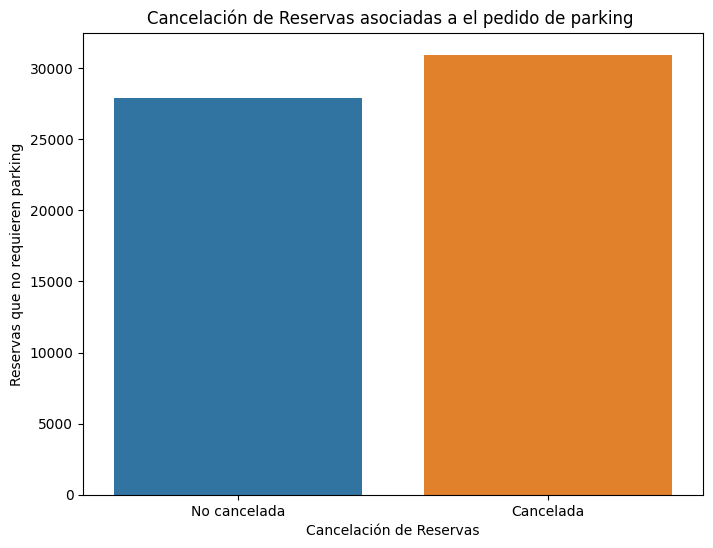

In [195]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_no_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que no requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Existe una mayor cantidad de reservas canceladas ,a simple vista podems notar que no es una gran diferencia,veamos las que si requerian que puede ser una variable mas significativa para el analisis

In [196]:
ds_parking_requiere['is_canceled'].value_counts()

0    3070
Name: is_canceled, dtype: int64

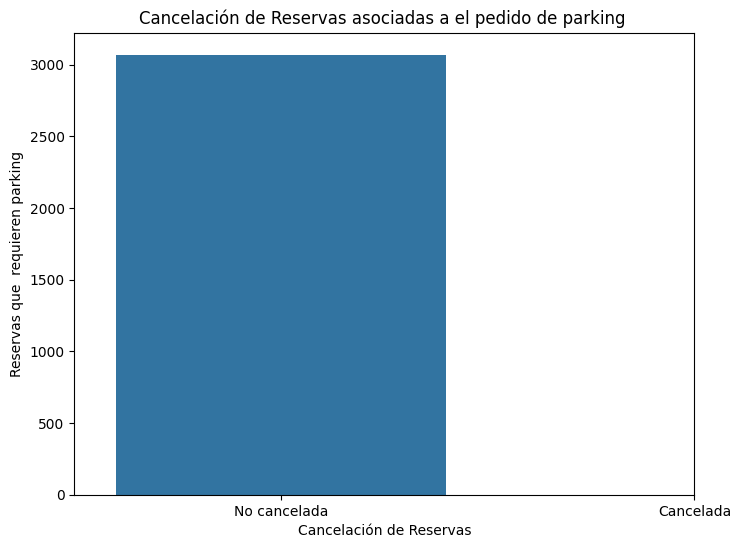

In [197]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que  requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Con respecto a las reservas con requerimiento de parking,notamos que ni una de ellas tuvo cancelacion,por lo cual hace que esta variable tenga mucho mas peso en nuestro analisis.
La tasa de cancelación para las reservas que requieren estacionamiento es igual a cero

# 26 y 27) Variable StaysInWeekNights y StaysInWeekendNights

## Stays-in-week-nights

Es una variable cuantitativa que describe el número de noches entre semana (de lunes a viernes)que el huésped se quedó o reservó su estadía en el hotel.
Vamos a buscar una posible relación entre esta variable con la variable "is_canceled".

## Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [ ]:
columna_weekNights = ds_hoteles_train['stays_in_week_nights']

columna_weekNights.isna().sum()

In [230]:
(columna_weekNights >= 0).value_counts()

True    61913
Name: stays_in_week_nights, dtype: int64

Podemos observar que no hay valores faltantes y tambien que no hay valores fuera del rango valido por lo que podemos concluir que la columna esta bien cargada

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [199]:
columna_weekNights.describe()

count    61913.000000
mean         2.510054
std          1.884926
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64


*   La mayoría de las reservas tienen una estadía de 1 o 2 noches entre semana,ya que estos valores tienen el recuento más alto.
*   Hay una cantidad significativa de reservas con estadías de 3 y 5 noches entre semana.
*   Las estadías más largas, como 10, 12, 15, y más noches, son menos comunes, pero aún están presentes en el conjunto de datos.


Veamos en un grafico estos datos

Text(0.5, 1.0, 'Boxplot Stays in week nights')

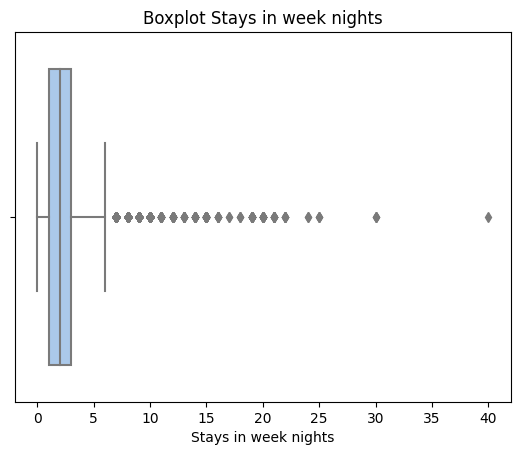

In [232]:
sns.boxplot(x = columna_weekNights, palette = "pastel")
plt.xlabel('Stays in week nights')

plt.title("Boxplot Stays in week nights")

Podemos notar que existen valores que son atipicos en un analisis univariado,tanto el caso del valor 30 y 40 podemos notar que estan muy alejados del Boxplot

Analicemos variando si las reservas fueron canceladas o no,sin tener en cuenta esas reservas que su valor es 0(no tienen reservas en dia de semana)

In [200]:
reservas_canceladas = ds_hoteles_train[ds_hoteles_train['is_canceled'] == 1]
reservas_no_canceladas = ds_hoteles_train[ds_hoteles_train['is_canceled'] == 0]

In [201]:
columna_reservas_canceladas_noches_semana = reservas_canceladas['stays_in_week_nights']

columna_reservas_canceladas_noches_semana = columna_reservas_canceladas_noches_semana[columna_reservas_canceladas_noches_semana != 0]

columna_reservas_canceladas_noches_semana.value_counts()

2     10352
1      6888
3      5941
5      2741
4      2443
6       405
7       229
10      200
8       156
9        67
15       33
14       21
11       21
12       19
19       17
20       12
16        9
21        9
22        6
13        5
18        3
17        2
24        2
40        1
30        1
Name: stays_in_week_nights, dtype: int64

In [202]:
columna_reservas_canceladas_noches_semana.describe()

count    29583.000000
mean         2.681371
std          1.846618
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

Podemos ver que :


* Hay un total de 3,170 reservas canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas canceladas es aproximadamente 2.751 noches.

*   La desviación estándar es aproximadamente 1.87, lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.




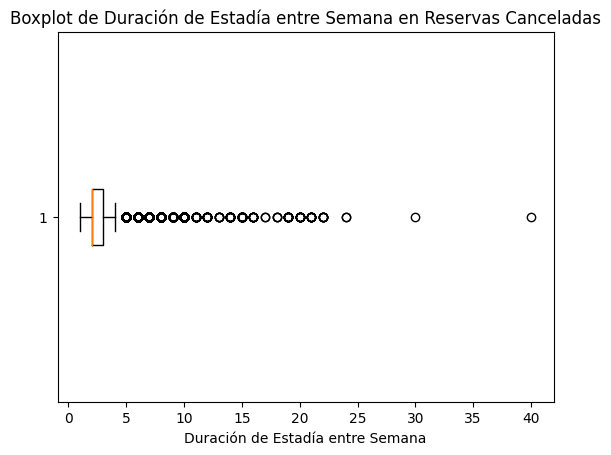

In [203]:
plt.boxplot(columna_reservas_canceladas_noches_semana, vert=False)


plt.xlabel('Duración de Estadía entre Semana')
plt.title('Boxplot de Duración de Estadía entre Semana en Reservas Canceladas')

plt.show()

Veamos respecto de las no canceladas

In [204]:
columna_reservas_no_canceladas_noches_semana = reservas_no_canceladas['stays_in_week_nights']

columna_reservas_no_canceladas_noches_semana = columna_reservas_no_canceladas_noches_semana[columna_reservas_no_canceladas_noches_semana != 0]

columna_reservas_no_canceladas_noches_semana.value_counts()

1     8534
2     7689
3     5648
5     2918
4     2537
6      391
10     308
7      300
8      189
9       55
15      15
20       9
12       9
19       6
11       6
13       6
25       3
30       2
14       2
21       1
Name: stays_in_week_nights, dtype: int64

In [205]:
columna_reservas_no_canceladas_noches_semana.describe()

count    28628.000000
mean         2.657608
std          1.814770
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: stays_in_week_nights, dtype: float64

Podemos ver que :


* Hay un total de 3,070 reservas no canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 2.66 noches.

*   La desviación estándar es aproximadamente 1.76, lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.

Los datos son muy similares a los que la reserva fue cancelada




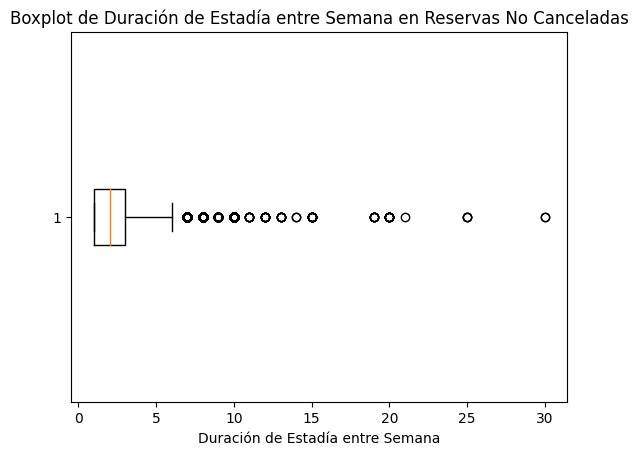

In [206]:
plt.boxplot(columna_reservas_no_canceladas_noches_semana, vert=False)


plt.xlabel('Duración de Estadía entre Semana')
plt.title('Boxplot de Duración de Estadía entre Semana en Reservas No Canceladas')

plt.show()

## StaysInWeekendNights
Es una variable cuantiativa que describe el número de noches en el fin de semana (sabados y domingos)que el huésped se quedó o reservó su estadía
en el hotel.
Vamos a separar el analisis en base de si cancelaron o no la reserva

## Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [233]:
columna_weekendNights = ds_hoteles_train['stays_in_weekend_nights']

columna_weekendNights.isna().sum()

0

In [234]:
(columna_weekendNights >= 0).value_counts()

True    61913
Name: stays_in_weekend_nights, dtype: int64

Podemos observar que no hay valores faltantes y tambien que no hay valores fuera del rango valido por lo que podemos concluir que la columna esta bien cargada

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [235]:
columna_weekendNights.describe()

count    61913.000000
mean         0.924135
std          0.993101
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

Veamos en un grafico estos datos

Text(0.5, 1.0, 'Boxplot Stays in weekend nights')

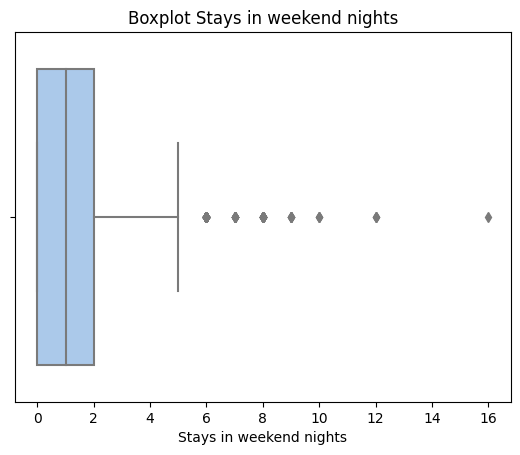

In [236]:
sns.boxplot(x = columna_weekendNights, palette = "pastel")
plt.xlabel('Stays in weekend nights')

plt.title("Boxplot Stays in weekend nights")

In [207]:
columna_reservas_canceladas_noches_fin_de_semana = reservas_canceladas['stays_in_weekend_nights']

columna_reservas_canceladas_noches_fin_de_semana = columna_reservas_canceladas_noches_fin_de_semana[columna_reservas_canceladas_noches_fin_de_semana != 0]

columna_reservas_canceladas_noches_fin_de_semana.value_counts()

2     8712
1     7761
4      410
3      313
6       59
5       28
8       26
7       12
9        5
10       1
16       1
12       1
Name: stays_in_weekend_nights, dtype: int64

In [208]:
columna_reservas_canceladas_noches_fin_de_semana.describe()

count    17329.000000
mean         1.652317
std          0.784201
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

Podemos ver que :


* Hay un total de 1871 reservas canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 1,67 noches.

*   La desviación estándar es aproximadamente 0,79 , lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.

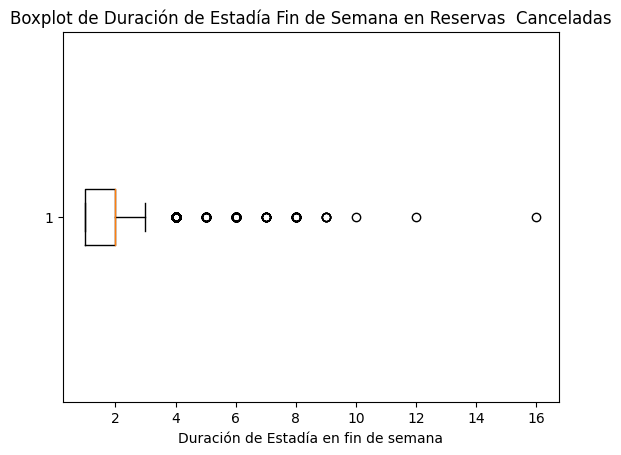

In [209]:
plt.boxplot(columna_reservas_canceladas_noches_fin_de_semana,vert= False)

plt.xlabel('Duración de Estadía en fin de semana')
plt.title('Boxplot de Duración de Estadía Fin de Semana en Reservas  Canceladas')

plt.show()

Veamos las no canceladas

In [210]:
columna_reservas_no_canceladas_noches_fin_de_semana = reservas_no_canceladas['stays_in_weekend_nights']
columna_reservas_no_canceladas_noches_fin_de_semana = columna_reservas_no_canceladas_noches_fin_de_semana[columna_reservas_no_canceladas_noches_fin_de_semana != 0]

columna_reservas_no_canceladas_noches_fin_de_semana.value_counts()

2     8536
1     8098
4      524
3      323
6       23
5       14
8       10
10       2
12       2
7        1
9        1
Name: stays_in_weekend_nights, dtype: int64

In [211]:
columna_reservas_no_canceladas_noches_fin_de_semana.describe()

count    17534.000000
mean         1.630147
std          0.731217
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: stays_in_weekend_nights, dtype: float64

Podemos ver que :


* Hay un total de 1920 reservas canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 1.61 noches.

*   La desviación estándar es aproximadamente 0.692, lo que indica una dispersión moderada alrededor de la media.

Los datos son muy similares a los que la reserva fue cancelada

Por ultimo juntaremos las dos variables para poder ver como varia las cancelaciones con la cantidad de dias totales.La hipotesis es que a medida que las estadias,son de menores dias,hay mas probabilidad de que se cancelen,dado que pueden ser reservas por trabajo y las que tienen mas dias conllevan a una planificacion mas concreta

Juntemos las variables en una copia



In [212]:
df_copia_noches = ds_hoteles_train.copy()

df_copia_noches['total_noches'] = df_copia_noches['stays_in_week_nights'] + df_copia_noches['stays_in_weekend_nights']

columna_total_noches = df_copia_noches['total_noches']

columna_total_noches.value_counts()

2     14789
3     14389
1     10323
4      8973
7      4418
5      3988
6      2025
8       606
10      582
14      452
9       442
0       297
11      199
12      121
13       71
21       41
15       34
18       24
16       24
25       19
28       18
17       12
29       11
19       10
20        9
30        8
23        6
26        4
22        4
24        3
42        3
27        2
33        2
35        2
56        1
34        1
Name: total_noches, dtype: int64

Noto que hay 30 reservas asociadas a que no tienen ninguna noche asocidada,por lo cual voy a desestimarlas ya que no expresan nada en el analisis

In [213]:
columna_total_noches = columna_total_noches[columna_total_noches != 0]

columna_total_noches.describe()

count    61616.000000
mean         3.450743
std          2.518417
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         56.000000
Name: total_noches, dtype: float64

Podemos visualizar con los datos obtenidos,que la mayor cantidad de reservas se encuentra en los primeros 7 dias,y comienza luego a disminuir,por lo cual vamos a superar en 2 grupos para realizar el analisis,recordadn nuestra hipotesis de que a menor dias,mayor cantidad de cancelaciones.
Primero separemos los grupos por criterio

In [214]:
criterio_grupo1 = ((df_copia_noches['total_noches'] >=1 ) & (df_copia_noches['total_noches'] <= 7))
criterio_grupo2 = (df_copia_noches['total_noches'] > 7)



df_noches_menor_que_7 = df_copia_noches[criterio_grupo1]
df_noches_mayor_que_7  = df_copia_noches[criterio_grupo2]



In [215]:
columna_noches_menor_que_7= df_noches_menor_que_7['total_noches']

columna_noches_menor_que_7.value_counts()

2    14789
3    14389
1    10323
4     8973
7     4418
5     3988
6     2025
Name: total_noches, dtype: int64

Veamos la relacion con las canceladas y las no canceladas a ver como se comporta frente a la hipotesis

In [216]:
df_noches_menor_que_7 ['is_canceled'].value_counts()

1    29606
0    29299
Name: is_canceled, dtype: int64

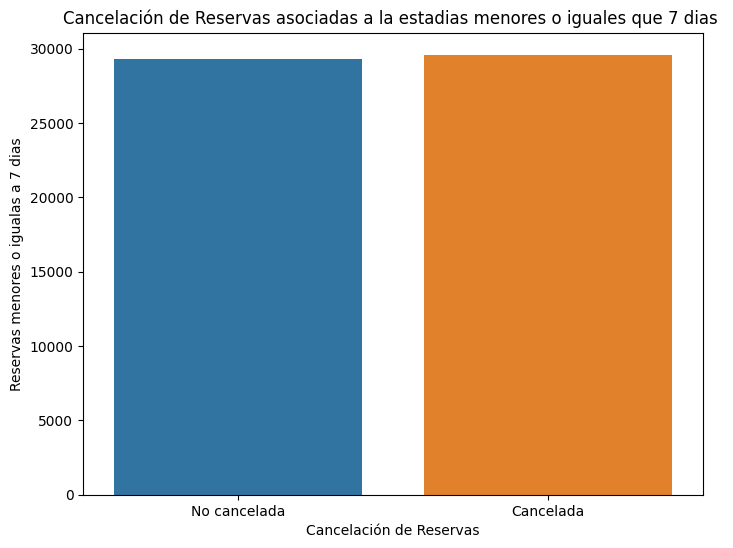

In [217]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_noches_menor_que_7, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas menores o igualas a 7 dias')
plt.title('Cancelación de Reservas asociadas a la estadias menores o iguales que 7 dias ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Notamos que a simple vista la hipotesis no es correcta,veamos como se comporta con el otro analisis

In [218]:
df_noches_mayor_que_7 ['is_canceled'].value_counts()

0    1399
1    1312
Name: is_canceled, dtype: int64

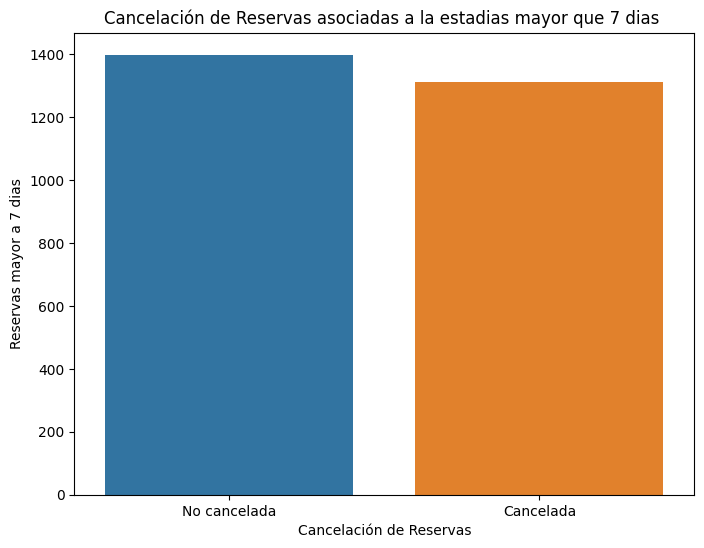

In [219]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_noches_mayor_que_7, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas mayor a 7 dias')
plt.title('Cancelación de Reservas asociadas a la estadias mayor que 7 dias ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar que no varia los resultados en estos grupos de datos,quedando la hipotesis sin ningun sentido



---

# 28) Variable Previous Cancellations

Esta es una columna cuantitativa que hace referencia a la cantidad de cancelaciones previas hechas por algun usuario con un perfil asociado previa a la reserva registrada en el dataset. Si no habia ningun perfil asociado a ese usuario este valor se setea en 0.



## Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [220]:
validacion_previous_cancelations = ds_hoteles_train["previous_cancellations"] >= 0
validacion_previous_cancelations.value_counts()

True    61913
Name: previous_cancellations, dtype: int64

In [221]:
ds_hoteles_train["previous_cancellations"].isna().sum()

0

Podemos observar que las todas los valores de esta columna estan dentro de un rango valido. Por lo que procedemos a hacer una analisis de la distribucion de los valores

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [222]:
ds_hoteles_train["previous_cancellations"].describe()

count    61913.000000
mean         0.114790
std          0.993723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

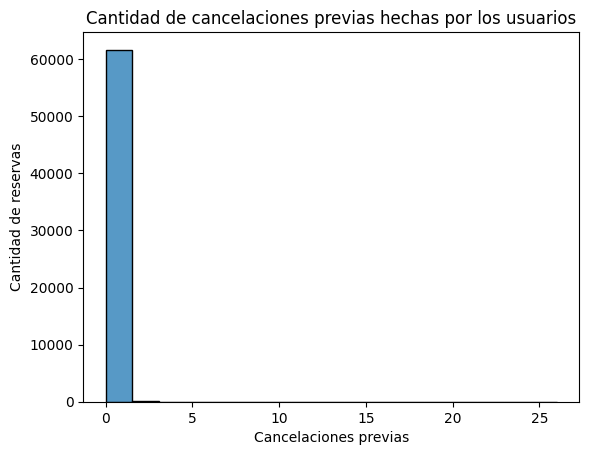

In [238]:
sns.histplot(data = ds_hoteles_train, x = "previous_cancellations")
plt.xlabel('Cancelaciones previas')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de cancelaciones previas hechas por los usuarios')
plt.show()

Podemos observar que la amplia mayoria de los usuarios registrados en el dataset no han hecho cancelaciones previas. A primera vista no parece una variable que podria llegar a determinar si una reserva va a ser cancelada o no. Observemos mas detalladamente aquellos usuarios que si han hecho cancelaciones previas

In [224]:
ds_cancelaciones_mayores_a_0 = ds_hoteles_train.loc[ds_hoteles_train["previous_cancellations"] > 0 ]
ds_cancelaciones_mayores_a_0.shape

(4394, 32)

In [225]:
ds_cancelaciones_mayores_a_0["is_canceled_cat"].value_counts()

Cancelada       4173
No Cancelada     221
Name: is_canceled_cat, dtype: int64

Si bien es un caso mas particular, podemos concluir que si un usuario ha hecho previas cancelaciones, es probable que cancele la reserva del hotel



---

# 29) Variable Reserved Room Type


Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia a el código del tipo de habitación reservada.

## Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay datos mal cargados

In [226]:
columna_reserved_room_type = ds_hoteles_train['reserved_room_type']

columna_reserved_room_type.value_counts()

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

In [227]:
columna_reserved_room_type.isna().sum()

0

Ya que no tiene ningun valor nulo,veamos como se distribuyen las cancelaciones con los distintos tipos de habitacion

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

Notamos que la mayoria de las reservas esta asociada al tipo de habitacion 'A'

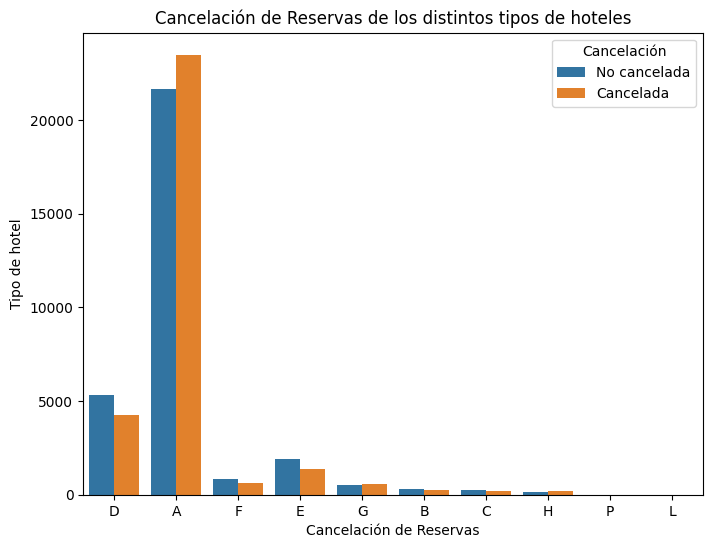

In [228]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train, x='reserved_room_type' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Tipo de hotel')
plt.title('Cancelación de Reservas de los distintos tipos de hoteles')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Dada la informacion que nos proporciona el grafico,las reservas canceladas por el tipo de hotel,tienen una varianza significativa,no se encuentra a simple vista ningun patron significativo para poder declarar una hipotesis